In [47]:
# this cell imports the libraries or packages that you can use during this assignment
# you are not allowed to import additional libraries or packages

from helpers import *
import os
import itertools
import numpy as np
import pandas as pd

# Machine Learning and Decomposition
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import skfuzzy as fuzz

# Statistical tools
from scipy.stats import multivariate_normal
from scipy import linalg

# Visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap, LogNorm
import seaborn as sns

# Extras
from sklearn.metrics import silhouette_score

> **Important**
>
> Do not import any other packages or libraries than the ones already provided to you. You can only use the imported packages _after_ they have been imported.
>
> Write your code between the `BEGIN_TODO` and `END_TODO` markers. Do not change these markers.
>
> Restart your notebook and run all cells before submission.

---
---
---

# Assignment 1b

## Introduction
In this assignment you will learn about different data analysis methods for creating a biking lane detector with the data you have collected in Assignment 1a.This assignment is split into 4 parts. Part 1 will introduce K-means clustering aglorithm and guide you through its implementations and limitations. Part 2 will introduce fuzzy c-means algorithm. Part 3 will explain Gaussian mixture model (GMM), which you will train using the expectation-maximization algorithm. Eventually you are expected to train GMM on your biking data, and use it to assess the biking lane quality of a route in Tilburg.

### Learning goals
After this assignment you can

- implement the K-means algorithm;
- explain issues and shortcomings of the K-means algorithm;
- implement the fuzzy c-means algorithm;
- implement the Gaussian mixture model;
- explain how the Gaussian mixture model differs from the previous algorithms;
- test your model against real world testing set to detect the biking lane quality.

## Part 1: K-means algorithm
In this part we will discuss unsupervised machine learning problems and describe how the K-means algorithm can be used to solve these.

Unsupervised machine learning problems are problems in which we try to determine some particular structure within a data set. Alternatively, supervised machine learning problems require us to model some kind of input-output mapping. Unsupervised machine learning problems do not have a specified output which we would like to model. Instead we are insterested in making sense of the data and in grouping this data, without knowing beforehand which and how many groups exist.

The K-means algorithm can group $N$ data samples of dimension $D$ into $K$ groups or clusters. These clusters can each be characterized by their mean vector: the expected or average value of the points which are assigned to the cluster. The mean vector denoting the center of the $k^{th}$ cluster can be represented as the column vector ${\bf{\mu}}^{(k)} = [\mu_1^{(k)},\ \mu_2^{(k)},\ \ldots, \mu_D^{(k)}]^\top$ and the $n^{th}$ data sample can be represented by the column vector ${\bf{x}}^{(n)} = [x_1^{(n)},\ x_2^{(n)},\ \ldots, x_D^{(n)}]^\top$, where the superscript denotes the sample index.

The K-means algorithm tries to minimize the (within-cluster) Euclidean squared distance
$$J({\bf{X}}, {\bf{\mu}}) = \frac{1}{N}\sum_{n=1}^N \sum_{k=1}^K \rho_k^{(n)} \| {\bf{x}}^{(n)} - {\bf{\mu}}^{(k)}\|^2$$
Here $\rho_k^{(n)}$ is a so-called indicator function that is defined as 
$$ \rho_k^{(n)} = \begin{cases} 1 & \text{if sample }{\bf{x}}^{(n)}\text{ is assigned to cluster }k \\ 0 & \text{otherwise}\end{cases}$$
This indicator function equals $1$ when the corresponding data point is assigned to the corresponding cluster and $0$ otherwise. The cost function therefore represents the average squared distance with respect to the cluster that a point is assigned to.

The algorithm is specified as follows:

1. Initialize means ${\bf{\mu}}$.
2. Assign data points to closest cluster mean (i.e. update $\rho_k^{(n)}$).
3. Calculate new cluster means as the average values of the points that are assigned to it (i.e. update ${\bf{\mu}}$).
4. Calculate cost function $J({\bf{X}}, {\bf{\mu}})$.
5. If not converged, go back to 2 and repeat.

Here we will describe the algorithm in words. First the centers of the clusters are initialized. This can be done arbitrarily, but often the centers are set to random (but distinct) samples of the data set.
Once the means are set, we assign each data sample to the cluster that is closest to it. In order to do so, we calculate the Euclidean squared distance between a point and all the clusters and find the cluster that is closest to it. We repeat this for all points and we therefore completely specify $\rho_k^{(n)}$. Once all points have been assigned to a cluster, we look up all points corresponding to a certain cluster and we average these to calculate the new cluster center. We update all cluster means. Then we evaluate the current fit of the clusters on the data by evaluating the cost function. If we still see a significant improvement in the cost function, we repeat updating the assignments and cluster centers and if the cost function seems to have converged, we stop iterating.

In this part of the assignment you will implement the K-means algorithm from scratch, starting with the initialization of the cluster means.


---
---
### Exercise 1.1: Initializing cluster centers
Consider the function `X = ex3_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ transposed data vectors of dimension $D$. Create a function `means = initialize_means(X, K)` that accepts the data set ${\bf{X}}$  and number of clusters $K$ as input and returns a matrix of shape (K x D), representing the vertical concatenation of $K$ transposed mean vectors of dimension $D$. These means should be initialized such that they coincide with *random* samples from the data set, which are always *distinct*. In other words, the means should equal a random subset of the availabe data set, where no means are equal. Also keep in mind that the number of clusters is variable in this function.

In [48]:
#// BEGIN_TODO Complete the function initialize_means(X, K)
def initialize_means(X, K):
     return X[np.random.choice(X.shape[0], K, replace=False)]
#// END_TODO

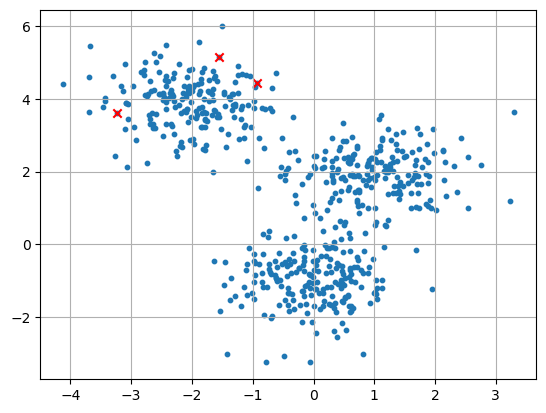

In [49]:
# generate data
X = ex3_generate_data()

# initialize means
means = initialize_means(X, 3)

# plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], 10)
plt.scatter(means[:,0], means[:,1], c="red", marker="x")
plt.grid()

### End of exercise 1.1
---
---

Now that the clusters have been initialized, it is time to assign points to the closest clusters.

---
---
### Exercise 1.2: Assign points to clusters
Again consider the function `X = ex4_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ transposed data vectors of dimension $D$. Create a function `rho = assign_data_to_clusters(X, means)` that accepts the data set ${\bf{X}}$ and matrix of means ${\bf{\mu}}$ as input and returns a matrix of shape (N x K), which contains all indicator functions $\rho_k^{(n)}$. This matrix should be a matrix of only ones and zeros and each row should sum to 1. Note that this is essentially the partition matrix.

In [50]:
#// BEGIN_TODO Complete the function assign_data_to_clusters(X, means)
def assign_data_to_clusters(X, means):
    rho = np.zeros((X.shape[0], means.shape[0]))
    rho[np.arange(X.shape[0]), np.argmin(np.linalg.norm(X[:, None] - means, axis=2), axis=1)] = 1
    return rho

#// END_TODO 

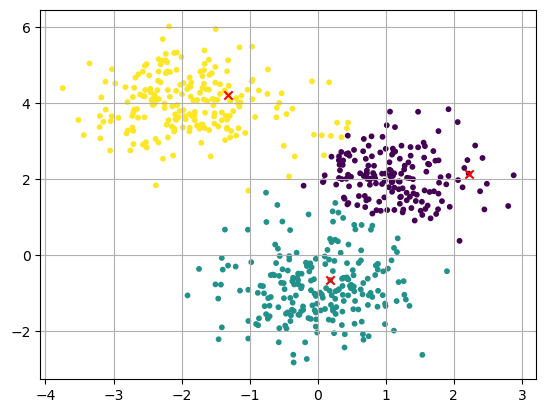

In [51]:
# generate data
X = ex3_generate_data()

# initialize means
means = initialize_means(X, 3)

# assign point to clusters
rho = assign_data_to_clusters(X, means)
assert np.allclose(np.sum(rho, axis=1), 1), "Sum of probabilities for each point does not add up to 1!"

# plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], 10, c=np.argmax(rho, axis=1))
plt.scatter(means[:,0], means[:,1], c="red", marker="x")
plt.grid()

### End of exercise 1.2
---
---

The means have been initialized, the points have been assigned to clusters. Now the cluster centers can be updated.

---
---
### Exercise 1.3: Update cluster centers

Again consider the function `X = ex3_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ data vectors of dimension $D$. Create a function `means = update_cluster_centers(X, rho)` that accepts the data set ${\bf{X}}$ and matrix of indicators $\rho$ as input and returns a matrix of shape (K x D), which contains the new cluster centers.

In [52]:
#// BEGIN_TODO  Complete the function update_cluster_centers(X, rho)
def update_cluster_centers(X, rho):
    # Number of clusters (K) and number of features (D)
    K = rho.shape[1]
    D = X.shape[1]
    
    # Initialize the means matrix
    means = np.zeros((K, D))
    
    # Compute the new cluster centers
    for k in range(K):
        # Get the indices of the data points assigned to cluster k
        indices = np.where(rho[:, k] == 1)[0]
        
        # Compute the mean of the data points assigned to cluster k
        if len(indices) > 0:
            means[k] = np.mean(X[indices], axis=0)
    
    return means
#// END_TODO 

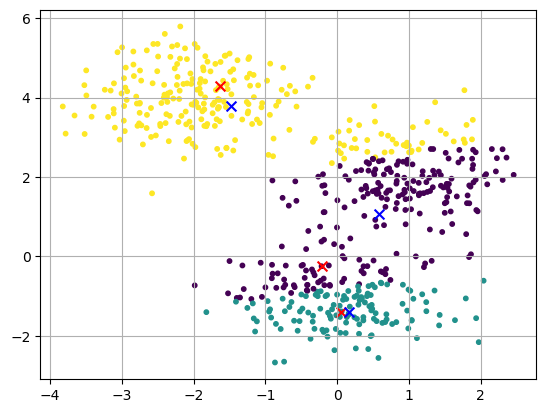

In [53]:
# generate data
X = ex3_generate_data()

# initialize means
means = initialize_means(X, 3)

# assign point to clusters
rho = assign_data_to_clusters(X, means)

# update means
means_new = update_cluster_centers(X, rho)

# plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], 10, c=np.argmax(rho, axis=1))
plt.scatter(means[:,0], means[:,1], 50, c="red", marker="x")
plt.scatter(means_new[:,0], means_new[:,1], 50, c="blue", marker="x")
plt.grid()

### End of exercise 1.3
---
---

Almost there! Now it is just a matter of combining the previous functions for finalizing the K-means algorithm.

---
---
### Exercise 1.4: Implement K-means algorithm

First create a function `J = Kmeans_loss(X, means, rho)` that calculates the within-cluster Euclidean squared distance as defined above. Secondly create the final `means, rho, J = Kmeans(X, K)` function that combines all previous functions to create the K-means algorithm as specified in the the introduction of this part of the assignment. This function returns the final cluster centers, the indicator function and a history of the losses. Save the loss *after* each iteration and stop iterating when the difference in loss does no longer exceed 1e-10. The initial loss based on the randomly initialized means should not be returned.

In [54]:
#// BEGIN_TODO Complete the Kmeans_loss(X, means, rho) function
def Kmeans_loss(X, means, rho):
    N = X.shape[0]
    K = means.shape[0]
    loss = 0.0
    
    for n in range(N):
        for k in range(K):
            if rho[n, k] == 1:
                loss += np.linalg.norm(X[n] - means[k])**2
    
    return loss / N #this is J, specified earlier in the markdown cell
#// END_TODO 

In [55]:
#// BEGIN_TODO  Complete the Kmeans(X, K) function
def Kmeans(X, K, tol=1e-10): #This name will get confusing for sure as the Scikit function is also called KMeans, but with a capital M. But we have mentioned it later on for clarity.
    N, D = X.shape
    
    # Initialize cluster centers randomly
    np.random.seed(42)
    initial_indices = np.random.choice(N, K, replace=False)
    means = X[initial_indices]
    
    # Initialize variables
    rho = np.zeros((N, K))
    J_history = []
    J_prev = float('inf')
    
    while True:
        # Assign clusters
        rho = assign_data_to_clusters(X, means)
        
        # Update cluster centers
        means = update_cluster_centers(X, rho)
        
        # Compute loss
        J = Kmeans_loss(X, means, rho)
        J_history.append(J)
        
        # Check for convergence
        if abs(J_prev - J) < tol:
            break
        
        J_prev = J
    
    return means, rho, J_history
#// END_TODO 

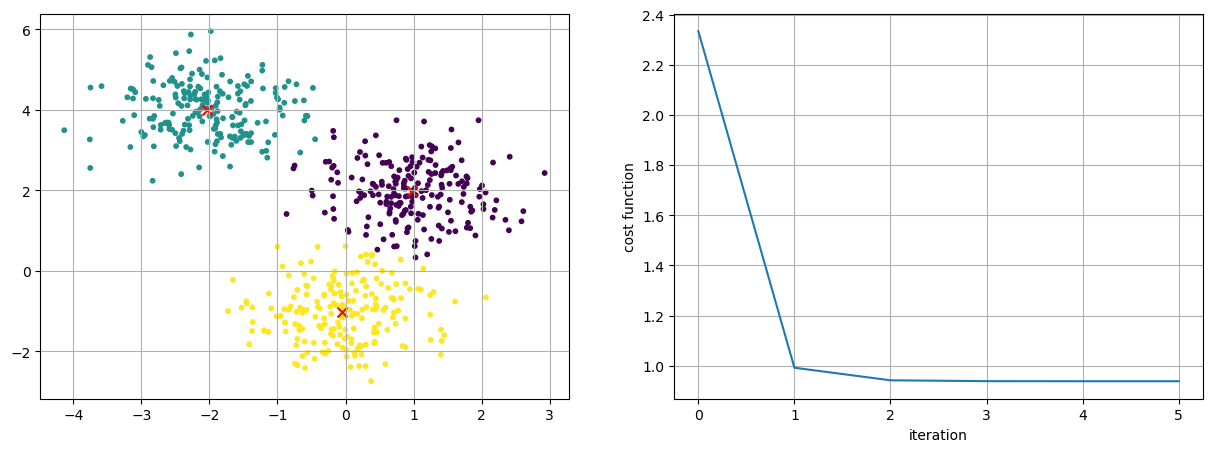

In [56]:
# generate data
X = ex3_generate_data()

# initialize means
means, rho, J = Kmeans(X, 3)

# plot data
_,ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X[:,0], X[:,1], 10, c=np.argmax(rho, axis=1))
ax[0].scatter(means[:,0], means[:,1], 50, c="red", marker="x")
ax[1].plot(J)
ax[0].grid(), ax[1].grid(), ax[1].set_ylabel("cost function"), ax[1].set_xlabel("iteration");

### End of exercise 1.4
---
---

---
---
### Exercise 1.5: Number of clusters
In the previous assignment the data had been generated from 3 clusters. In practice the number of clusters is often unknown. In this exercise we will see what happens when we add extra clusters. Run your K-means algorithm on the previous data set for 2 up to and including 10 clusters and save the final value of the loss (i.e. the loss value when the algorithm has converged).

Plot the final loss against the number of used clusters.

In [57]:
# generate data
X = ex3_generate_data()

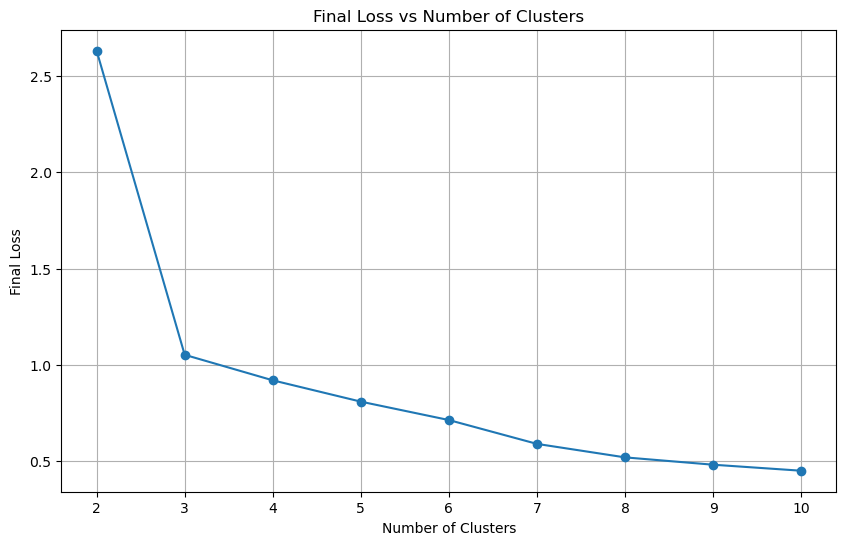

In [58]:
#// BEGIN_TODO Plot the Kmeans loss against the number of clusters
# Initialize an empty list to store the final loss values
final_losses = []

# Run K-means for 2 to 10 clusters
for K in range(2, 11):
    means, rho, J_history = Kmeans(X, K)
    final_losses.append(J_history[-1])

# Plot the final loss against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), final_losses, marker='o')
plt.title('Final Loss vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Final Loss')
plt.grid(True)
plt.show()
#// END_TODO 

Does the loss give a good impression of how many clusters can be found in the data set. Please motivate your answer.


Does the loss give a good impression of how many clusters can be found in the data set. Please motivate your answer.

#// BEGIN_TODO Finding an appropriate number of clusters

Yes, it can provide some insights but not a very definitive and final answer. 
- This elbow method is very indicative of the optimal number of clusters, but is better to be used with another method to confirm the number of clusters like the silhouette score.
- Here, 3 ranging till 6,7 seems good. But increasing number of clusters just because it reduces loss leads to overfitting. (each data cluster might end up having too few data points)

The silhouette plot is made too below.
- Here, its clear that 3 clusters are the best choice. So, we understand that 3 is the best choice after looking at both the plots.

#// END_TODO 

/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

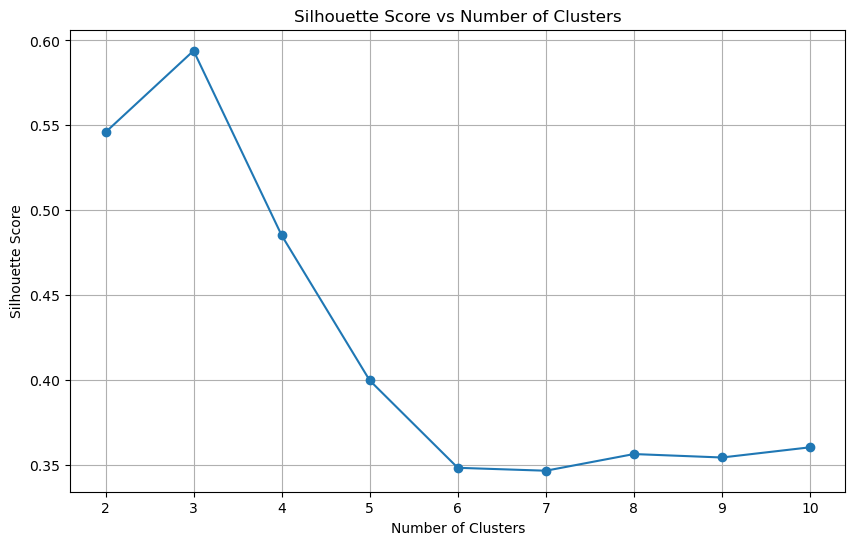

In [59]:
#// BEGIN_TODO Finding an appropriate number of clusters



#// BEGIN_TODO Finding an appropriate number of clusters
# Fit a range of KMeans models and calculate the silhouette scores
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the silhouette scores against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#// END_TODO 

---
---
### Exercise 1.6: Shortcomings of the K-means algorithm
Apply the K-means algorithm for the new data set generated by `X = ex36_generate_data()`. Visualise the data and come up with an appropriate number of clusters. Plot the data points in a scatter plot, plot the means as red crosses in the same plot and color the data point according to their assigned cluster.

In [60]:
# generate data
X = ex36_generate_data()

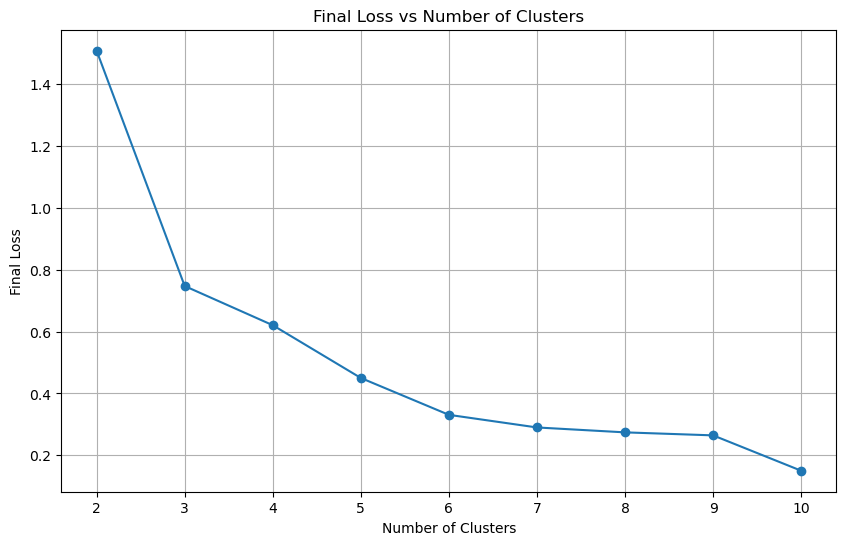

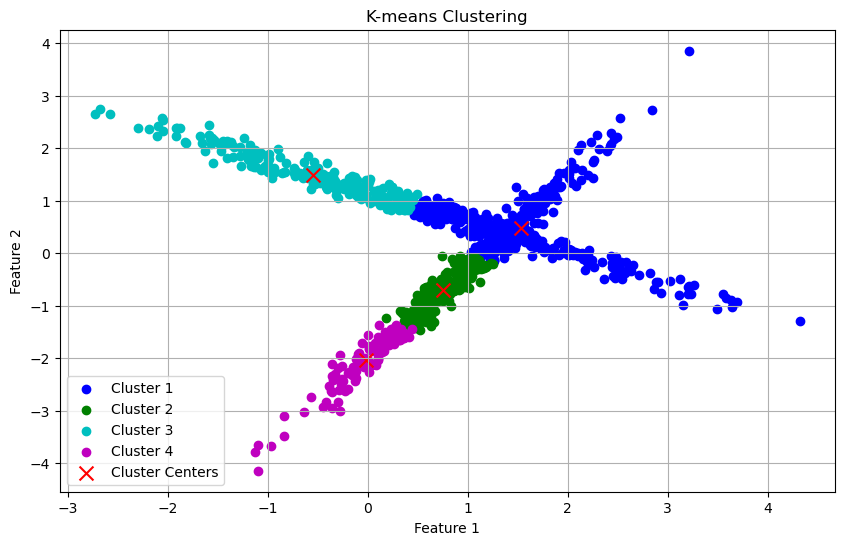

In [61]:
#// BEGIN_TODO  Plot clusters for the new data set

# We'll determine the number of clusters using the elbow method
final_losses = []
for K in range(2, 11):
    means, rho, J_history = Kmeans(X, K)
    final_losses.append(J_history[-1])

# Plot the final loss against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), final_losses, marker='o')
plt.title('Final Loss vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Final Loss')
plt.grid(True)
plt.show()

# Based on the elbow plot, let's assume the appropriate number of clusters is 4
K = 4
means, rho, J_history = Kmeans(X, K)

# Visualize the data points and cluster centers
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']
for k in range(K):
    cluster_points = X[rho[:, k] == 1]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
#// END_TODO 

### End of exercise 1.6
---
---

---
---
### Exercise 1.7: Clustering biking data
Apply the K-means algorithm on the biking data you have collected from assignment 1a, namely the three matrices, combined_features, smooth_features and bumpy_features. Employ PCA with 2 components before you apply K-means. Visualize the data with the cluster centers, and determine the optimum number of clusters for each matrix. For this task, you can use scikit learn packages.



/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

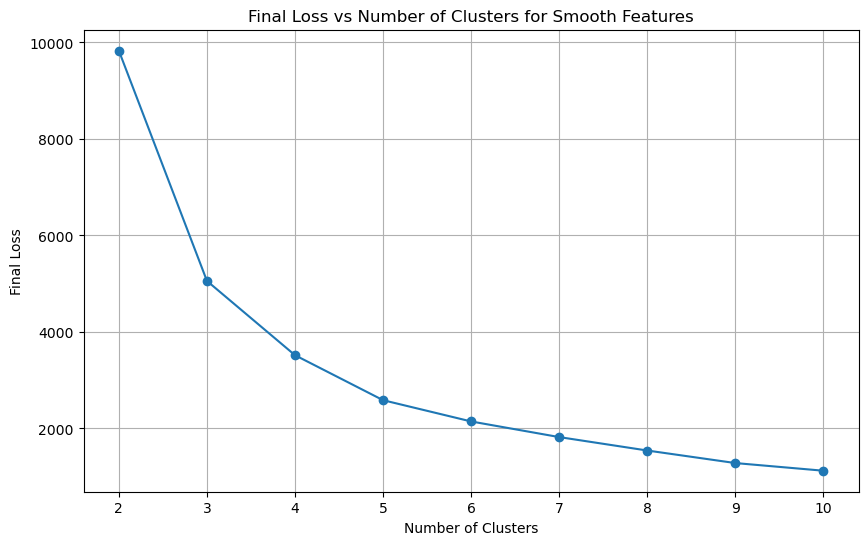

/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

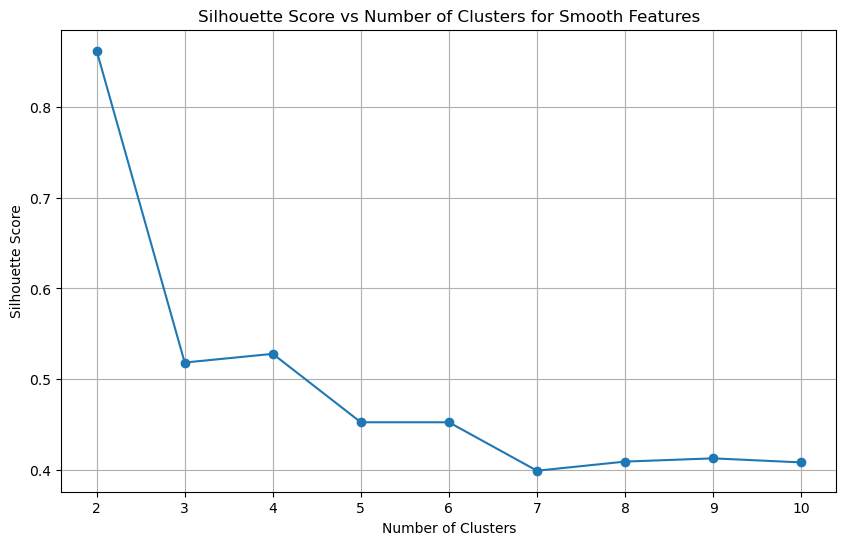

/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

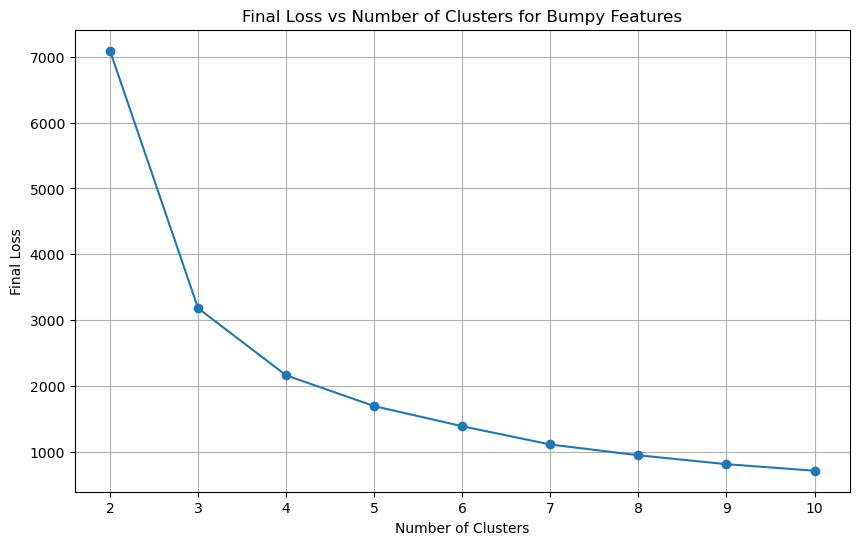

/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

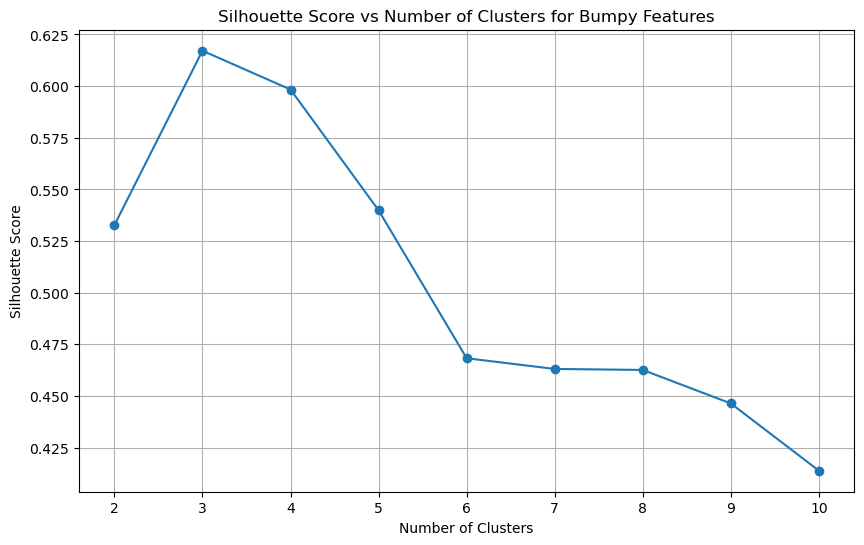

/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

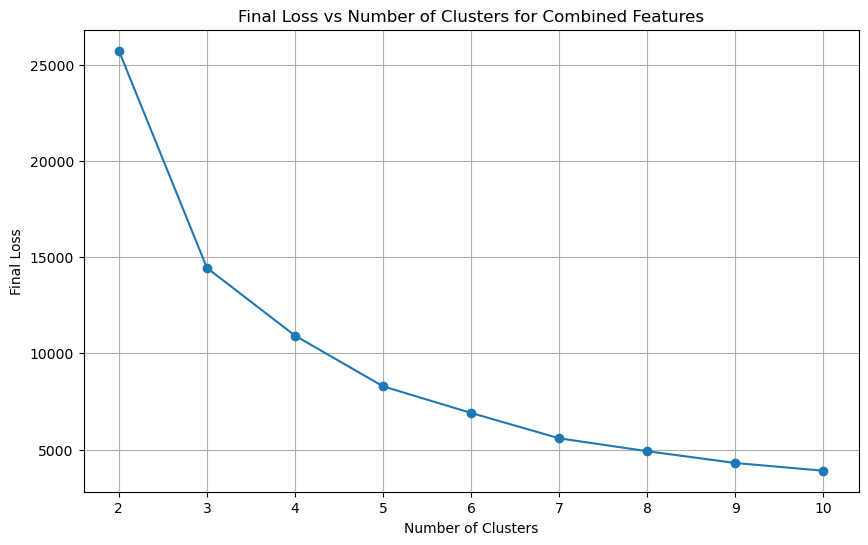

/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

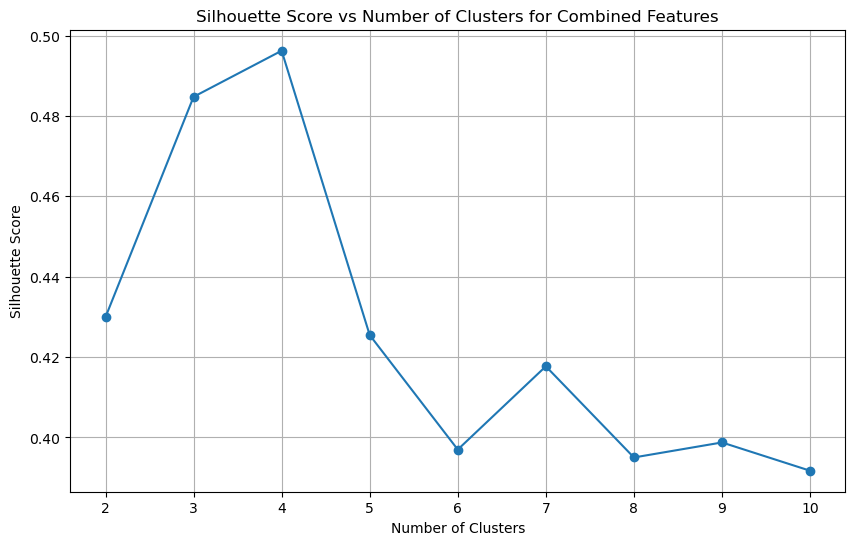

/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


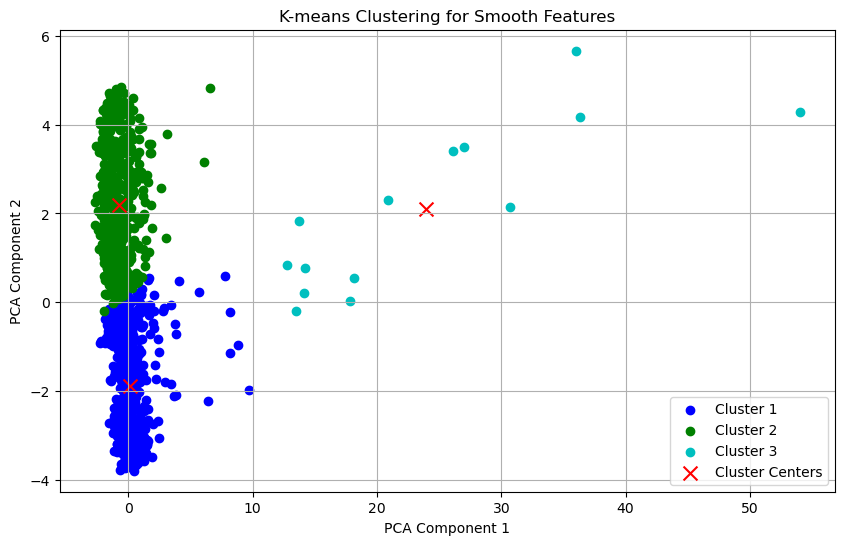

/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


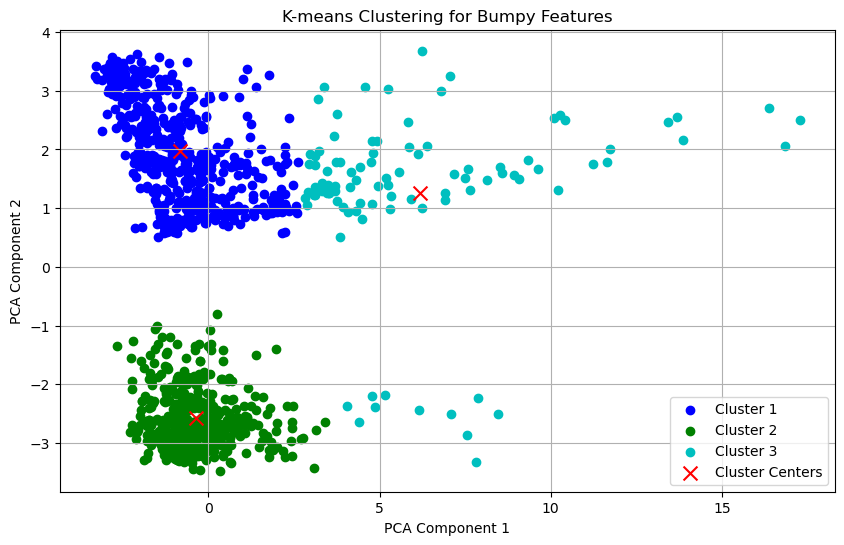

/opt/anaconda3/envs/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


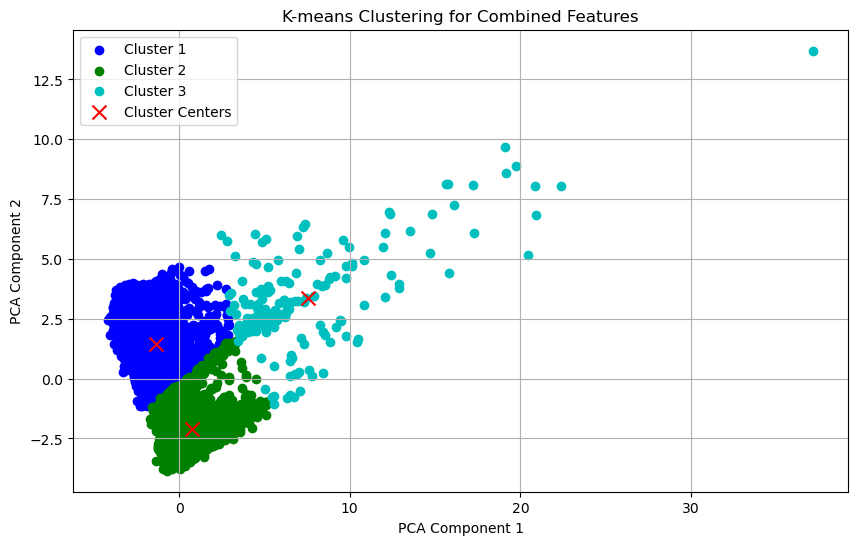

In [62]:
#// BEGIN_TODO  apply k-means and visualize cluster centers and determine optimum number of clusters for each matrix

# Read the CSV files
smooth_features = pd.read_csv('smooth_features.csv')
bumpy_features = pd.read_csv('bumpy_features.csv')
combined_features = pd.read_csv('combined_features.csv')

# Apply PCA with 2 components to datasets
pca = PCA(n_components=2)
pca_smooth = pca.fit_transform(smooth_features)
pca_bumpy = pca.fit_transform(bumpy_features)
pca_combined = pca.fit_transform(combined_features)

# Function to apply K-means and visualize the results
def apply_kmeans(data, title):

    # We'll use two indicators to determine the optimal number of clusters

    # 1. Elbow method
    final_losses = []
    for K in range(2, 11):
        kmeans = KMeans(n_clusters=K, random_state=42)
        kmeans.fit(data)
        final_losses.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), final_losses, marker='o')
    plt.title(f'Final Loss vs Number of Clusters for {title}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Final Loss')
    plt.grid(True)
    plt.show()

    # 2. Silhouette scores
    silhouette_scores = []
    for K in range(2, 11):
        kmeans = KMeans(n_clusters=K, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title(f'Silhouette Score vs Number of Clusters for {title}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()
    
# Function to visualize the clusters
def cluster_plots(data, title, optimal_K):
        # Apply K-means with the optimal number of clusters, we'll decide this based on the two indicator plots we're plotting before this
        kmeans = KMeans(n_clusters=optimal_K, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        
        # Visualize the data points and cluster centers
        plt.figure(figsize=(10, 6))
        colors = ['b', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']
        for k in range(optimal_K):
            cluster_points = data[labels == k]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k+1}')
        plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
        plt.title(f'K-means Clustering for {title}')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend()
        plt.grid(True)
        plt.show()


# Apply the function to each dataset
apply_kmeans(pca_smooth, 'Smooth Features')
apply_kmeans(pca_bumpy, 'Bumpy Features')
apply_kmeans(pca_combined, 'Combined Features')

# Example usage of the cluster_plots function, # This is determined based on the two plots we do.
optimal_K_smooth = 3  
optimal_K_bumpy = 3     
optimal_K_combined = 3  

cluster_plots(pca_smooth, 'Smooth Features', optimal_K_smooth)
cluster_plots(pca_bumpy, 'Bumpy Features', optimal_K_bumpy)
cluster_plots(pca_combined, 'Combined Features', optimal_K_combined)

#// END_TODO 

`#// BEGIN_TODO determine optimum number of clusters quantitatively`

From the 2 types of plots, the elbow and silhouette plot. We conclude that
- Smooth dataset can have 2 or 3 as the optimum number of clusters. 2 preffered.
- Bumpy dataset can have 3 as the optimum number of clusters.
- Combined dataset can have 3 or 4 as the optimum number of clusters. 4 preffered due to silhoette score.

`#// END_TODO`


`#// BEGIN_TODO motivate your answer behind the number of clusters`

There are two types of plots plotted above. One is an elbow plot and another is a silhoette plot. We understood that sticking to just one indicator isn't the best practice, both these plots aim to show the optimum number of clusters that reduce the losses and has the highest silhoette score (which means that it's well related to the cluster its put in) respectively.


`#// END_TODO`


### End of exercise 1.7
---
---

## Part 2: Fuzzy C-Means Algorithm

In this part, we will explore another unsupervised machine learning algorithm known as Fuzzy C-Means (FCM). Unlike K-means, which assigns each data point to a single cluster, FCM allows each data point to belong to multiple clusters with varying degrees of membership.

FCM is particularly useful when cluster boundaries are not well-defined. It provides a nuanced understanding of the data by allowing overlapping clusters, which is more appropriate when the data naturally overlaps between clusters.

### Overview
The Fuzzy C-Means algorithm groups $N$ data samples of dimension $D$ into $C$ clusters, where each cluster is characterized by its cluster center, denoted by the column vector ${\bf{v}}^{(k)} = [v_1^{(k)},\ v_2^{(k)},\ \ldots, v_D^{(k)}]^\top$, similar to the mean vector in K-means. However, instead of assigning each data point to a single cluster, FCM assigns a membership value, denoted by $\mu_k^{(n)}$, to each data point for each cluster. This membership value indicates the degree with which the data point belongs to the cluster.

The membership values for the $n^{\text{th}}$ data sample across all clusters are represented by the vector ${\bf{\mu}}^{(n)} = [\mu_1^{(n)}, \mu_2^{(n)}, \ldots, \mu_C^{(n)}]^\top$, where $\mu_k^{(n)}$ is the membership value of the $n^{\text{th}}$ data sample in the $k^{\text{th}}$ cluster. These membership values satisfy two conditions:
1. $0 \leq \mu_k^{(n)} \leq 1$ for all $k$ and $n$.
2. $\sum_{k=1}^C \mu_k^{(n)} = 1$ for each $n$.

The algorithm aims to minimize the following objective function:

$$
J({\bf{X}}, {\bf{U}}, {\bf{V}}) = \frac{1}{N}\sum_{n=1}^N \sum_{k=1}^C (\mu_k^{(n)})^m \| {\bf{x}}^{(n)} - {\bf{v}}^{(k)}\|^2
$$

Here:
- ${\bf{U}}$ represents the matrix of membership values.
- ${\bf{v}}^{(k)}$ represents the cluster center of the $k^{\text{th}}$ cluster.
- $m > 1$ is a weighting exponent that determines the fuzziness of the membership values.

### The Fuzzy C-Means Algorithm

1. **Initialize the Membership Matrix ${\bf{U}}$:**
   - Randomly initialize the membership values ${\bf{U}}$ such that they satisfy the constraints mentioned above.

2. **Calculate Cluster Centers ${\bf{v}}$:**
   - Compute the cluster center of each cluster as a weighted average of the data points, with weights given by the membership values:
   $$
   {\bf{v}}^{(k)} = \frac{\sum_{n=1}^N (\mu_k^{(n)})^m \cdot {\bf{x}}^{(n)}}{\sum_{n=1}^N (\mu_k^{(n)})^m}
   $$

3. **Update Membership Values ${\bf{U}}$:**
   - Update the membership values based on the distance between each data point and the cluster centers:
   $$
   \mu_k^{(n)} = \frac{1}{\sum_{j=1}^C \left(\frac{\|{\bf{x}}^{(n)} - {\bf{v}}^{(k)}\|}{\|{\bf{x}}^{(n)} - {\bf{v}}^{(j)}\|}\right)^{\frac{2}{m-1}}}
   $$

4. **Calculate the Cost Function $J({\bf{X}}, {\bf{U}}, {\bf{V}})$:**
   - Evaluate the current fit of the clusters using the objective function defined earlier.

5. **Check for Convergence:**
   - If the change in the cost function or the change in cluster centers is below a predefined threshold, stop the iteration. Otherwise, go back to step 2.



### Exercise 2.1: Initialization 
Initialize the membership partition matrix `U`. Choose also an appropriate value for $m$.


In [63]:
X = ex11_generate_data()

In [64]:
#// BEGIN_TODO  Initialization
def initialize_membership_matrix(N, C):
    # Randomly initialize the membership values
    U = np.random.rand(N, C)
    
    # Normalize the membership values so that they sum to 1 for each data point
    U = U / np.sum(U, axis=1, keepdims=True)
    
    return U

# Example usage
N = 100  # Number of data points
C = 3    # Number of clusters
m = 2    # Fuzziness parameter

U = initialize_membership_matrix(N, C)
#// END_TODO 

In [65]:
print("Initial Membership Matrix (U):")
print(U)

Initial Membership Matrix (U):
[[0.65024949 0.00431705 0.34543345]
 [0.09082441 0.2267371  0.6824385 ]
 [0.12127201 0.7243808  0.15434718]
 [0.34130739 0.25160938 0.40708323]
 [0.4314554  0.41631998 0.15222462]
 [0.11784664 0.64973577 0.2324176 ]
 [0.25299165 0.5166305  0.23037785]
 [0.41621682 0.32260273 0.26118045]
 [0.74176662 0.04177115 0.21646222]
 [0.32385949 0.15807185 0.51806866]
 [0.5454882  0.25147909 0.20303271]
 [0.50729375 0.2346947  0.25801155]
 [0.19214225 0.49697925 0.3108785 ]
 [0.3978299  0.42373622 0.17843388]
 [0.26357644 0.5156562  0.22076736]
 [0.33667885 0.39904043 0.26428072]
 [0.31007541 0.33661232 0.35331227]
 [0.46575874 0.06043843 0.47380282]
 [0.35970696 0.24043439 0.39985865]
 [0.30300346 0.53876509 0.15823145]
 [0.49986962 0.36400849 0.1361219 ]
 [0.19165329 0.49149651 0.3168502 ]
 [0.11379493 0.50951175 0.37669332]
 [0.51477122 0.22970785 0.25552093]
 [0.42151912 0.24646924 0.33201164]
 [0.30664938 0.54323207 0.15011854]
 [0.8366761  0.00383208 0.1594918

### End of exercise 2.1
---
---

### Exercise 2.2: Update cluster centers 
Update the cluster centers `V` based on the current membership matrix.


In [66]:
#// BEGIN_TODO  Update cluster centers
def update_cluster_centers_fcm(X, U, m):
    N, D = X.shape
    C = U.shape[1]
    
    V = np.zeros((C, D))
    
    for k in range(C):
        # Calculate the numerator and denominator for the k-th cluster center
        numerator = np.sum((U[:, k]**m)[:, None] * X, axis=0)
        denominator = np.sum(U[:, k]**m)
        
        # Update the k-th cluster center
        V[k] = numerator / denominator
    
    return V

# Example usage
N = 100  # Number of data points
D = 2    # Number of features
C = 3    # Number of clusters
m = 2    # Fuzziness parameter

# Randomly generate some data points
np.random.seed(42)
X = np.random.rand(N, D)

# Initialize the membership matrix
U = initialize_membership_matrix(N, C)

# Update the cluster centers
V = update_cluster_centers_fcm(X, U, m)
#// END_TODO 

In [67]:
print("Updated fuzzy Cluster Centers (V):")
print(V)

Updated fuzzy Cluster Centers (V):
[[0.48170362 0.48792772]
 [0.45471053 0.49443747]
 [0.47937724 0.49323361]]


### End of exercise 2.2
---
---

### Exercise 2.3: Update membership values
Update the membership matrix `U` based on the current cluster centers.


In [68]:
#// BEGIN_TODO# update partition matrix
def update_membership_matrix(X, V, m):
    N, D = X.shape
    C = V.shape[0]
    
    U = np.zeros((N, C))
    
    for n in range(N):
        for k in range(C):
            numerator = np.linalg.norm(X[n] - V[k])
            denominator = np.sum([(numerator / np.linalg.norm(X[n] - V[j]))**(2 / (m - 1)) for j in range(C)])
            U[n, k] = 1 / denominator
    
    return U

# Example usage
N = 100  # Number of data points
D = 2    # Number of features
C = 3    # Number of clusters
m = 2    # Fuzziness parameter

# Randomly generate some data points
np.random.seed(42)
X = np.random.rand(N, D)

# Initialize the membership matrix
U = initialize_membership_matrix(N, C)

# Update the cluster centers
V = update_cluster_centers_fcm(X, U, m)

# Update the membership matrix
U = update_membership_matrix(X, V, m)
#// END_TODO 

In [69]:
print("Updated Membership Matrix (U):")
print(U)

Updated Membership Matrix (U):
[[0.32511398 0.34183747 0.33304855]
 [0.35046567 0.29917651 0.35035783]
 [0.32765951 0.34774401 0.32459648]
 [0.32151782 0.3509201  0.32756208]
 [0.33740743 0.31551836 0.34707421]
 [0.32364134 0.347374   0.32898466]
 [0.3481111  0.31162728 0.34026162]
 [0.32714317 0.34902856 0.32382827]
 [0.29140709 0.40629977 0.30229314]
 [0.34005783 0.33480679 0.32513538]
 [0.34629012 0.31794479 0.33576509]
 [0.31492676 0.37286537 0.31220786]
 [0.32354012 0.34069827 0.33576161]
 [0.30807771 0.37774446 0.31417784]
 [0.34264513 0.32315281 0.33420206]
 [0.34773615 0.31602761 0.33623624]
 [0.3230722  0.3480663  0.3288615 ]
 [0.34012081 0.31862835 0.34125084]
 [0.33303473 0.33989795 0.32706733]
 [0.36425992 0.28354149 0.35219859]
 [0.31419097 0.36739391 0.31841512]
 [0.32254747 0.34923927 0.32821326]
 [0.30863502 0.37132842 0.32003655]
 [0.28933382 0.41030938 0.3003568 ]
 [0.34656287 0.31923031 0.33420682]
 [0.34078901 0.31762886 0.34158212]
 [0.33844269 0.3211598  0.3403975

### End of exercise 2.3
---
---

### Exercise 2.4: Repeat until convergence
employ iterative optimization and repeat until convergence, stop iterations when the convergence threshold ${\epsilon}\  < 10^{-5} $


In [70]:
#// BEGIN_TODO Repeat until convergence
def initialize_membership_matrix(N, C):
    U = np.random.rand(N, C)
    U = U / np.sum(U, axis=1, keepdims=True)
    return U

def update_cluster_centers_fcm(X, U, m):
    N, D = X.shape
    C = U.shape[1]
    
    V = np.zeros((C, D))
    
    for k in range(C):
        numerator = np.sum((U[:, k]**m)[:, None] * X, axis=0)
        denominator = np.sum(U[:, k]**m)
        V[k] = numerator / denominator
    
    return V

def update_membership_matrix(X, V, m):
    N, D = X.shape
    C = V.shape[0]
    
    U = np.zeros((N, C))
    
    for n in range(N):
        for k in range(C):
            numerator = np.linalg.norm(X[n] - V[k])
            denominator = np.sum([(numerator / np.linalg.norm(X[n] - V[j]))**(2 / (m - 1)) for j in range(C)])
            U[n, k] = 1 / denominator
    
    return U

def fuzzy_c_means(X, C, m=2, epsilon=1e-5, max_iter=100):
    N, D = X.shape
    
    # Initialize the membership matrix
    U = initialize_membership_matrix(N, C)
    
    for iteration in range(max_iter):
        # Update the cluster centers
        V = update_cluster_centers_fcm(X, U, m)
        
        # Update the membership matrix
        U_new = update_membership_matrix(X, V, m)
        
        # Check for convergence
        if np.linalg.norm(U_new - U) < epsilon:
            break
        
        U = U_new
    
    return V, U

# Example usage
N = 100  # Number of data points
D = 2    # Number of features
C = 3    # Number of clusters
m = 2    # Fuzziness parameter
epsilon = 1e-5  # Convergence threshold

# Randomly generate some data points
np.random.seed(42)
X = np.random.rand(N, D)

# Perform Fuzzy C-Means clustering
V, U = fuzzy_c_means(X, C, m, epsilon)
#// END_TODO 

In [71]:
print("Final Cluster Centers (V):")
print(V)
print("Final Membership Matrix (U):")
print(U)


Final Cluster Centers (V):
[[0.4045365  0.20579451]
 [0.17855785 0.7200722 ]
 [0.79787523 0.61081285]]
Final Membership Matrix (U):
[[0.11169284 0.67768629 0.21062087]
 [0.01664007 0.01355795 0.96980198]
 [0.76605554 0.15442067 0.07952379]
 [0.05741771 0.89044866 0.05213363]
 [0.11537871 0.1878397  0.69678159]
 [0.09645892 0.80732413 0.09621695]
 [0.41458399 0.11078797 0.47462804]
 [0.79172177 0.13772131 0.07055691]
 [0.28427851 0.58914335 0.12657814]
 [0.93760074 0.03042167 0.03197758]
 [0.78444043 0.07081224 0.14474733]
 [0.71424264 0.19879967 0.08695768]
 [0.13401115 0.55803399 0.30795486]
 [0.21854771 0.69984536 0.08160692]
 [0.7903029  0.07673434 0.13296276]
 [0.78623763 0.06867982 0.14508254]
 [0.08159744 0.83478667 0.08361589]
 [0.08215461 0.08879084 0.82905455]
 [0.91196624 0.0490165  0.03901726]
 [0.21901395 0.08729655 0.6936895 ]
 [0.22782284 0.6929222  0.07925496]
 [0.07630224 0.85194397 0.0717538 ]
 [0.03942677 0.92967606 0.03089718]
 [0.30311174 0.56381051 0.13307775]
 [0.

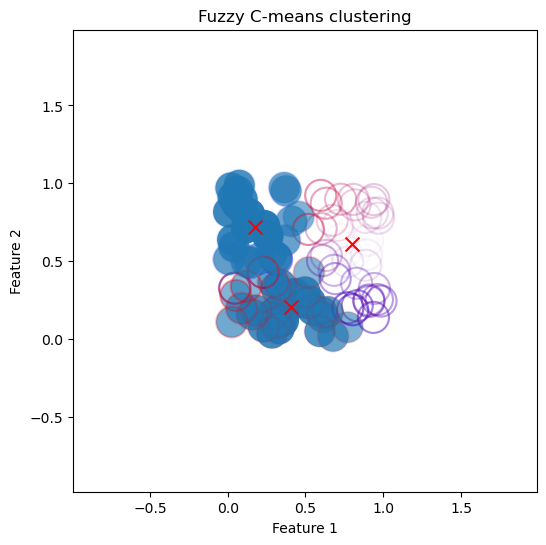

In [72]:
def plot_fuzzy_membership(X, U):
    """
    Plot the data points with fill color based on membership to both clusters.
    
    Parameters:
    - X: Data matrix (samples x features)
    - U: Membership matrix (samples x clusters)
    """
    plt.figure(figsize=(8, 6))
    
    # Define colors and markers
    edge_color = 'black'
    circle_radius = 0.1  # Increase the radius to make points larger
    
    # Plot data points for the first cluster
    for i in range(X.shape[0]):
        membership_value_1 = U[i, 0]
        if membership_value_1 > 0.5:
            # Higher membership: full blue
            circle_1 = plt.Circle((X[i, 0], X[i, 1]), radius=circle_radius, 
                                  fill=True, alpha=membership_value_1)
        else:
            # Lower membership: hollow blue
            circle_1 = plt.Circle((X[i, 0], X[i, 1]), radius=circle_radius,
                                  fill=False, edgecolor='blue', linewidth=1.5, alpha=membership_value_1)
        
        plt.gca().add_patch(circle_1)
    
    # Plot data points for the second cluster
    for i in range(X.shape[0]):
        membership_value_2 = U[i, 1]
        if membership_value_2 > 0.5:
            # Higher membership: full red
            circle_2 = plt.Circle((X[i, 0], X[i, 1]), radius=circle_radius,
                                  fill=True, alpha=membership_value_2)
        else:
            # Lower membership: hollow red
            circle_2 = plt.Circle((X[i, 0], X[i, 1]), radius=circle_radius, 
                                  fill=False, edgecolor='red', linewidth=1.5, alpha=membership_value_2)
        
        plt.gca().add_patch(circle_2)
    
    # Plot cluster centers
    plt.scatter(V[:, 0], V[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
    
    # Set plot limits
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Fuzzy C-means clustering')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


plot_fuzzy_membership(X, U)


### End of exercise 2.4
---
---

---
---
### Exercise 2.5: Clustering biking data
Apply the FCM algorithm on the biking data you have collected and preprocessed in assignment 1a. Namely the three matrices, combined_features, smooth_features and bumpy_features. Employ PCA with 2 components before you apply FCM. Visualize the data with the cluster centers, and determine the optimum number of clusters. For this task, you can use skfuzzy package. Compare your FCM clusters to K-means clusters and highlight any differences. 



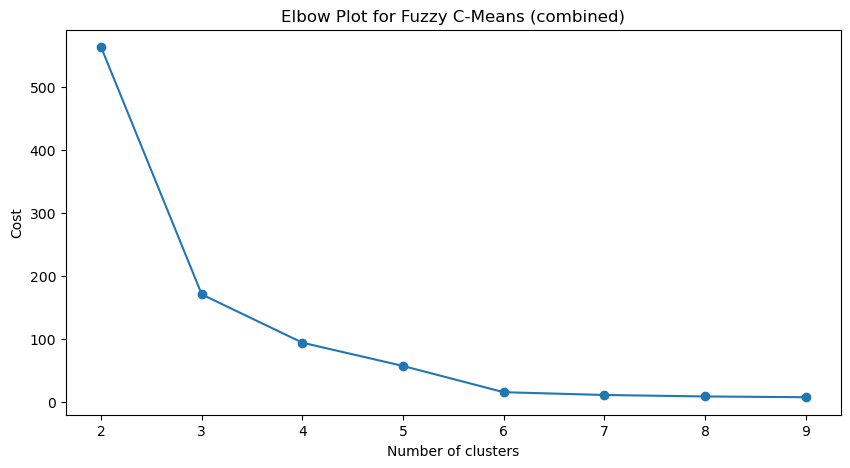

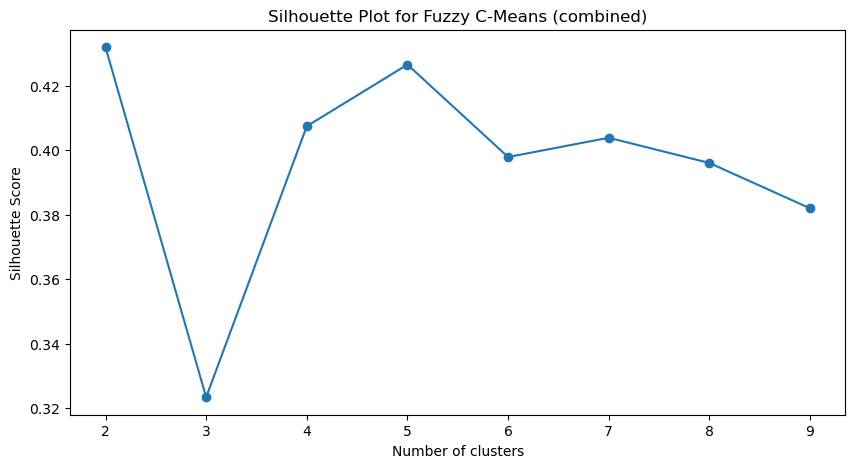

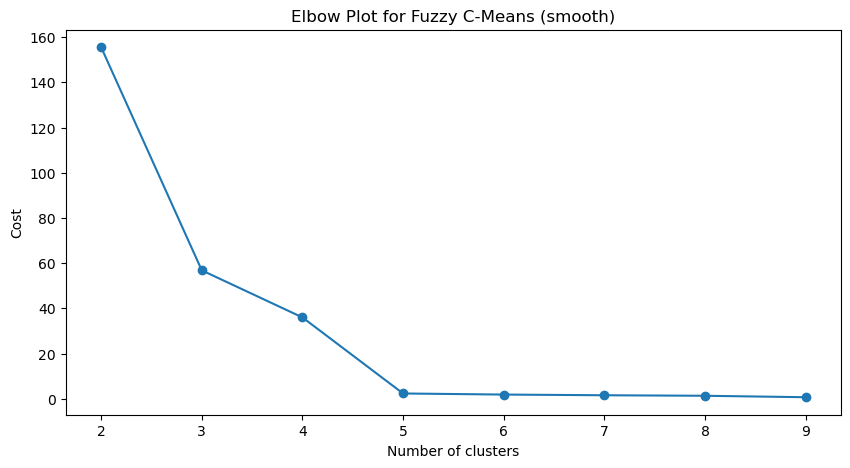

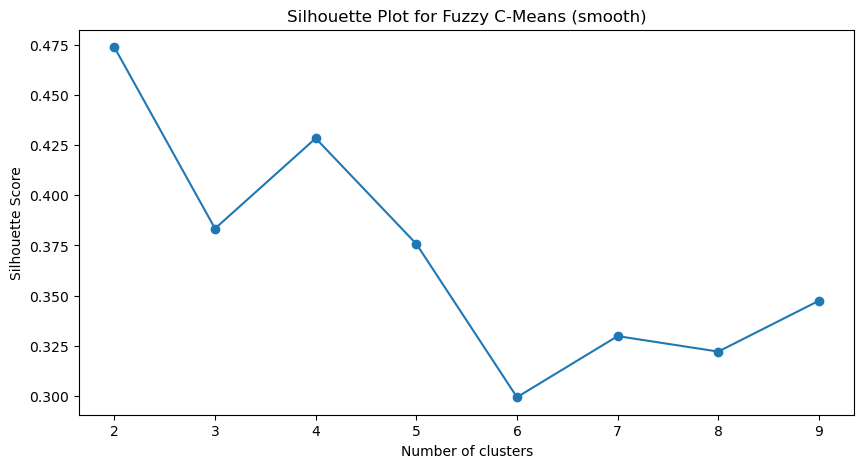

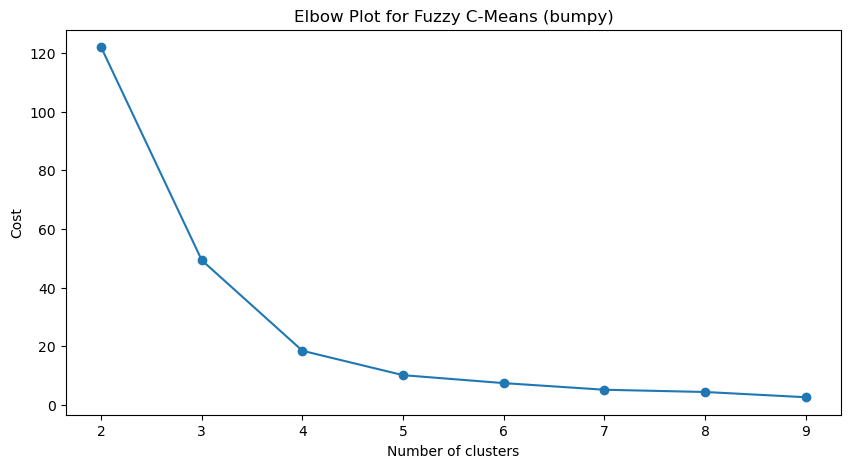

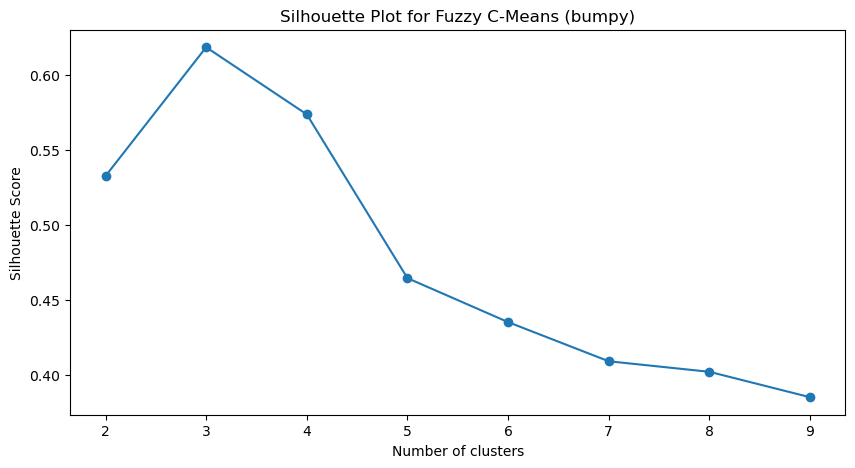

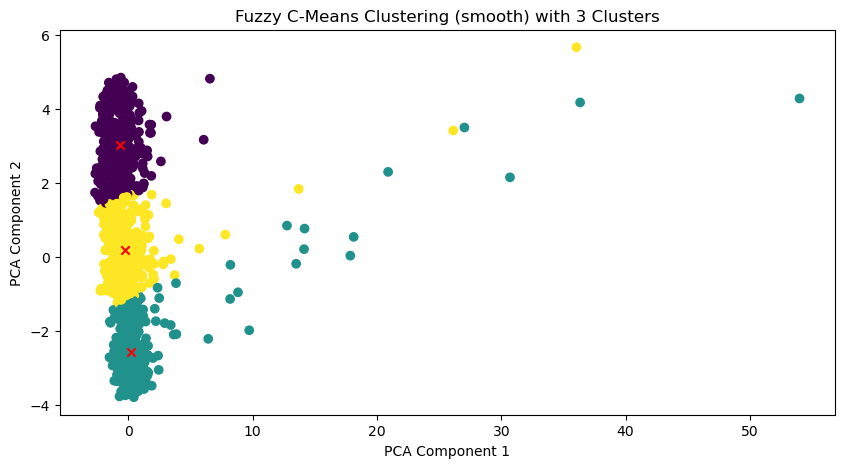

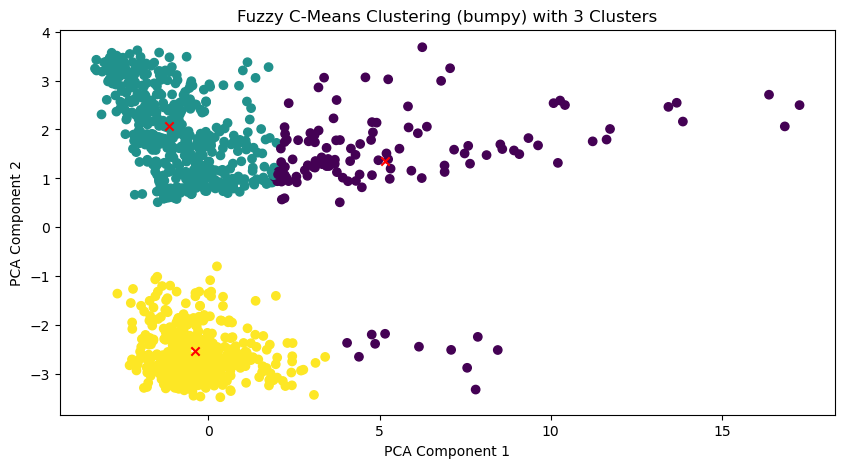

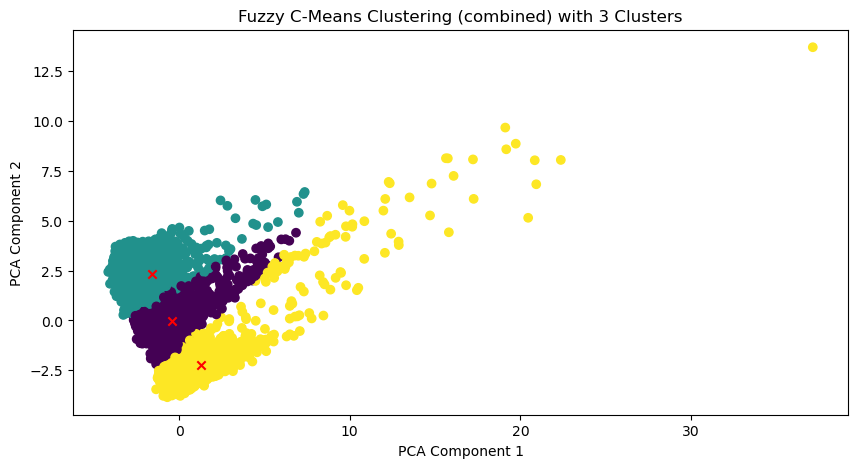

In [73]:
#// BEGIN_TODO Clustering biking data with FCM and determining optimum number of clusters

# Doing it again to avoid confusion. Though it's redundant code.
# Read the CSV files
smooth_features = pd.read_csv('smooth_features.csv')
bumpy_features = pd.read_csv('bumpy_features.csv')
combined_features = pd.read_csv('combined_features.csv')

# Apply PCA with 2 components to both datasets
pca = PCA(n_components=2)
pca_smooth = pca.fit_transform(smooth_features)
pca_bumpy = pca.fit_transform(bumpy_features)
pca_combined = pca.fit_transform(combined_features)

# Function to perform Fuzzy C-Means clustering
def fuzzy_c_means(data, n_clusters):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)
    return cntr, u

# Function to calculate the cost for the elbow plot
def calculate_cost(data, u):
    return np.sum(np.min(u, axis=0))

# Function to calculate silhouette score
def calculate_silhouette(data, u):
    labels = np.argmax(u, axis=0)
    return silhouette_score(data, labels)

# Let's make a dictionary of the pca applied dataframes
dataframes = {'combined': pca_combined, 'smooth': pca_smooth, 'bumpy': pca_bumpy}

for name, data in dataframes.items():
    # Elbow plot
    costs = []
    range_n_clusters = range(2, 10)
    for n_clusters in range_n_clusters:
        cntr, u = fuzzy_c_means(data, n_clusters)
        cost = calculate_cost(data, u)
        costs.append(cost)

    plt.figure(figsize=(10, 5))
    plt.plot(range_n_clusters, costs, marker='o')
    plt.title(f'Elbow Plot for Fuzzy C-Means ({name})')
    plt.xlabel('Number of clusters')
    plt.ylabel('Cost')
    plt.show()

    # Silhouette plot
    silhouette_scores = []
    for n_clusters in range_n_clusters:
        cntr, u = fuzzy_c_means(data, n_clusters)
        score = calculate_silhouette(data, u)
        silhouette_scores.append(score)

    plt.figure(figsize=(10, 5))
    plt.plot(range_n_clusters, silhouette_scores, marker='o')
    plt.title(f'Silhouette Plot for Fuzzy C-Means ({name})')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()


# Function to plot the clusters after deciding the optimal number of clusters from the plots
def fcm_clusterplots(data, name, optimal_clusters):
    # Perform Fuzzy C-Means clustering with the optimal number of clusters
    cntr, u = fuzzy_c_means(data, optimal_clusters)
    labels = np.argmax(u, axis=0)

    # Visualize the data with cluster centers
    plt.figure(figsize=(10, 5))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='x')
    plt.title(f'Fuzzy C-Means Clustering ({name}) with {optimal_clusters} Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Call the function to plot the clusters
fcm_clusterplots(pca_smooth,'smooth',3) #change the optimal cluster value here
fcm_clusterplots(pca_bumpy,'bumpy', 3)
fcm_clusterplots(pca_combined,'combined', 3)
#// END_TODO 



`#// BEGIN_TODO determine optimum number of clusters/qualitatively and compare with k-means`

The FCM technique made it easier to choose the optimum number of clusters compared to the k-means technique after plotting the elbow and silhoette charts. 

Looking at the FCM plots,
- 2 or 3 clusters seem reasonable for Smooth. Will go for 3, as the elbow chart suggests.
- 3 for bumpy
- 3 for combined. 

Earlier for combined plot using k-means, it suggested 4 clusters. That was a notable difference apart from FCM making it easier to decide vs k-means plots.

`#// END_TODO`


### End of exercise 2.5
---
---

## Part 3: Gaussian Mixture Modeling
The K-Means algorithm is a fast and simple method that works well for many applications. However, due to its simplicity, it isn't suitable for all situations. Fuzzy C-Means (FCM) improves on K-Means by allowing for soft clustering, where data points can belong to multiple clusters with varying degrees of membership. While this flexibility is advantageous, FCM has its own set of limitations. It can be computationally intensive, especially for large datasets, and is sensitive to the initial selection of cluster centers. Additionally, FCM may struggle with outliers, varying cluster sizes, and high-dimensional data, which can lead to suboptimal clustering results.

In this part we present another methodology for clustering data, namely through Gaussian mixture modeling. In this approach we do not rely on a deterministic algorithm for determining the cluster means and assignments, but instead we model the data set by fitting a probability density function.

We will assume that the data set has been generated from a Gaussian mixture model, which is formally specified as
$$ p({\bf{x}}^{(n)}) = \sum_{k=1}^K \rho_k \mathcal{N}({\bf{x}}^{(n)} \mid {\bf{\mu}}_k, \Sigma_k),$$
where a data sample ${\bf{x}}^{(n)}$ is originating from a Gaussian mixture model with $K$ individual Gaussian distributions with means ${\bf{\mu}}_k$ and covariance matrices ${\bf{\Sigma}}_k$. The mean denotes the center or mode of the Gaussian distribution and the covariance matrix specifies the spread and tilt of the Gaussian distribution. In this model the mixing coefficients $\rho_k$ specify how much each of the Gaussian distributions contributes in the model. Because the Gaussian mixture model is a probability density function, integrating over ${\bf{x}}$ should always equal 1. Because the individual Gaussians already satisfy this requirement, the mixing coefficients are constrained by
$$ \sum_{k=1}^K \rho_k = 1.$$
To give some intuition on this model, we give a 1-dimensional example below. Here we model a data set by a mixture of 2 Gaussians. The individual *weighted* Gaussian distributions are colored in blue and the corresponding mixture model distribution is colored in red.

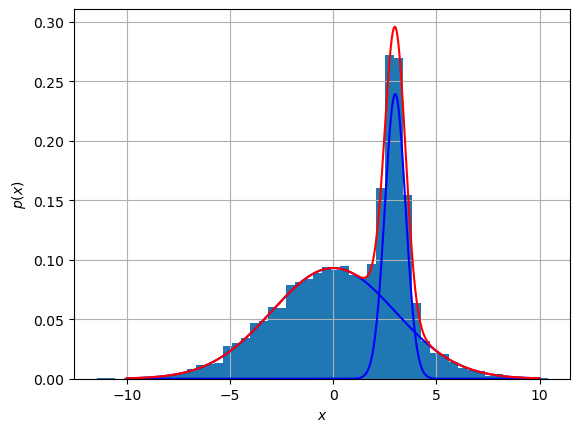

In [74]:
ex4_plot_GMM_1D()

During this part of the assignment you will implement the so-called Expectation-Maximization (EM) algorithm for learning the Gaussian mixture model. This algorithm consists of two steps, the expectation step (E-step) and the maximization step (M-step). The exact details of the algorithm are beyond the scope of this assignment, but here we will present the update equations for these steps.

The EM algorithm works as follows:

1. Initialize the means ${\bf{\mu}}_k$, covariances $\Sigma_k$ and mixing coefficients $\rho_k$. Often the means are initialized using the K-means algorithm. The covariance matrices can be set to identity matrices and the mixing coefficients can be initialized to the fraction of points assigned to the cluster with K-means divided by the total number of samples.
2. *Expectation step*: evaluate the responsibilities $\gamma_{nk}$ using the current parameter values as 
$$ \gamma_{nk} = \frac{\rho_k \mathcal{N}({\bf{x}}_n \mid {\bf{\mu}}_k, \Sigma_k)}{\sum_{j=1}^K \rho_j \mathcal{N}({\bf{x}}_n \mid {\bf{\mu}}_j, \Sigma_j)}$$
3. *Maximization step*: re-estimate the parameters using the current responsibilities
$$ {\bf{\mu}}_k^\text{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma_{nk}{\bf{x}}_n $$
$$ \Sigma_k^\text{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma_{nk} ({\bf{x}}_n - {\bf{\mu}}_k^\text{new})({\bf{x}}_n - {\bf{\mu}}_k^\text{new})^\top $$
$$ \rho_k = \frac{N_k}{N} $$
where $N$ denotes the number of samples and where
$$ N_k = \sum_{n=1}^N \gamma_{nk}$$
4. Evaluate the log-likelihood
$$ \ln p({\bf{X}} \mid {\bf{\mu}}, \Sigma, {\bf{\rho}}) = \sum_{n=1}^N \ln \left\{ \sum_{k=1}^K \rho_k \mathcal{N}({\bf{x}}^{(n)} \mid {\bf{\mu}}_k, \Sigma_k)\right\}$$

It is important to understand what is going on in this algorithm. The responsibilities $\gamma_{nk}$ are similar to the indicator functions from the K-means algorithm. However, where the K-means algorithm performs a hard clustering (each point can be assigned to only 1 cluster), the Gaussian mixture model allows for a soft clustering (each point can be modeled by both Gaussian distributions, but just to a different extent). The indicator function of the K-means algorithm was one-hot coded, meaning that a point was assigned to 1 cluster only. The responsibilities $\gamma_{nk}$ specify how likely a data sample ${\bf{x}}_n$ is to be generated from a cluster. With a Gaussian mixture model a point can therefore be assigned to different extents to multiple clusters. The expectation step calculates these responsibilities and the division in this expression makes sure that all rows sum op to 1.

In the maximization step the parameters are updated. Here the contribution of each data sample towards the parameters depends on the corresponding responsibilities. This means that a point that is very likely to have originated from a certain cluster will have a high influence on the statistics of that cluster. The variable $N_k$ specifies how many points are located to a certain Gaussian distribution. Because this parameter is the summation over the individual responsibilities, $N_k$ is not forced to be an integer.

The log-likelihood is a cost function which takes the variances and uncertainties in our model into account. It describes the probability of that data set being generated from a Gaussian mixture model. To prevent numerical instability we commonly use the log-likelihood instead of the normal likelihood.


---
---
### Exercise 3.1: Initialize clusters
Consider the function from the previous part `X = ex46_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ transposed data vectors of dimension $D$. Create a function `means, covs, rho = initialize_GMM(X, K)` that accepts the data set ${\bf{X}}$ as input and returns the following in this order:
- `means`: a matrix of size (K x D) that contains the initial cluster means, as a vertical concatenation of the transposed mean vectors. These means should be initialized using the previously written K-means algorithm.
- `covs`: a matrix of size (K x D x D) that contains the covariance matrices of the initial clusters. Each matrix `covs[k,:,:]` represents the covariance matrix of the $k^\text{th}$ cluster. Initialize these covariance matrices as identity matrices.
- `rho`: a vector of length K that contains the mixing coefficients as specified above. Initialize this vector based on the indicator function returned by the K-means algorithm.

In [75]:
#// BEGIN_TODO Complete the initialize_GMM(X, K) function
def initialize_GMM(X, K):
    # Perform custom K-means clustering
    means, rho, _= Kmeans(X, K) #this is our function defined earlier, not the sci-kit learn function. This has lowercase 'm' for Kmeans
    
    # Initialize covariance matrices as identity matrices
    D = X.shape[1]
    covs = np.array([np.eye(D) for _ in range(K)])
    
    # Initialize mixing coefficients based on K-means labels
    rho = np.sum(rho, axis=0) / X.shape[0]
    
    return means, covs, rho
#// END_TODO

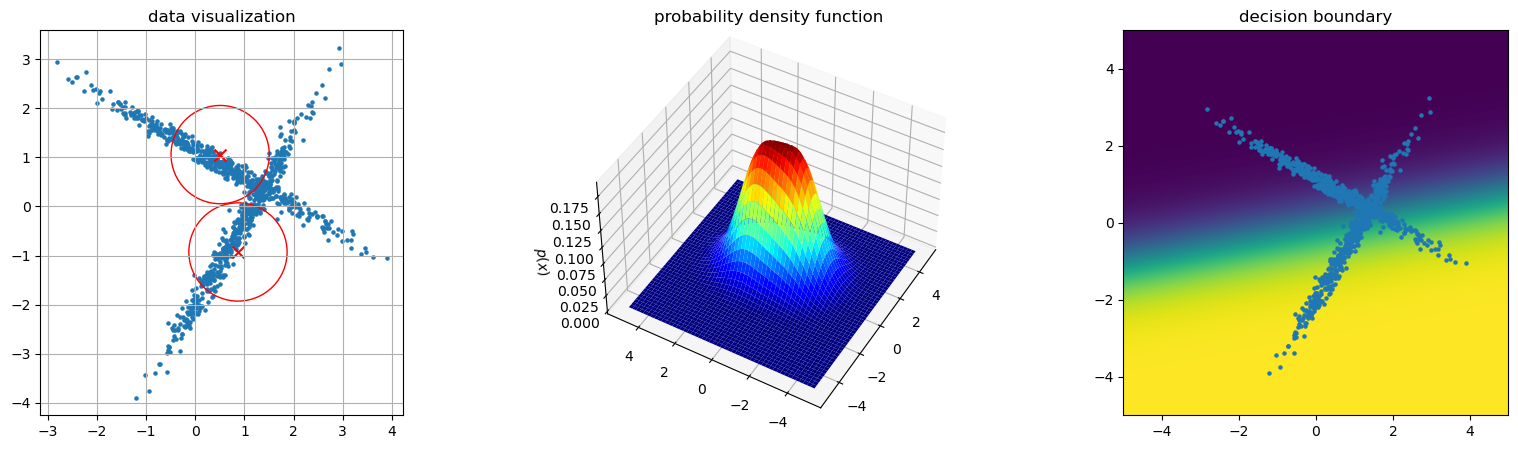

In [76]:
# fetch data
X = ex36_generate_data()

# initialize GMM
means, covs, rho = initialize_GMM(X, 2)

# plot GMM
ex4_plot_GMM(X, means, covs, rho)

### End of exercise 3.1
---
---

---
---
### Exercise 3.2: Expectation step
Create a function `gamma = expectation_step(X, means, covs, rho)` that accepts the data set, means, covariances and mixing coefficients with dimensions specified above. This function should perform the expectation step and should return the calculated responsibilities as defined above as a matrix of size (N x K) where each row corresponds to the assignment fraction of a sample amongst the different clusters. Make sure this matrix is properly normalized such that the elements in each row add up to 1. Use the `multivariate_normal` function that has been imported from `scipy.stats` at the beginning of this notebook.

In [77]:
#// BEGIN_TODO  Complete the expectation_step(X, means, covs, rho) function
def expectation_step(X, means, covs, rho):
    N, D = X.shape
    K = means.shape[0]
    
    # Initialize the responsibilities matrix
    gamma = np.zeros((N, K))
    
    # Calculate the probability density for each data point under each Gaussian component
    for k in range(K):
        mvn = multivariate_normal(mean=means[k], cov=covs[k])
        gamma[:, k] = rho[k] * mvn.pdf(X)
    
    # Normalize the responsibilities so that each row sums to 1
    gamma_sum = np.sum(gamma, axis=1, keepdims=True)
    gamma /= gamma_sum
    
    return gamma
#// END_TODO

In [78]:
gamma = expectation_step(X, means, covs, rho)

### End of exercise 3.2
---
---

---
---
### Exercise 3.3: Maximization step
Create a function `means, covs, rho = maximization_step(X, gamma)` that accepts the data set and responsibilities with dimensions specified above. This function should perform the maximization step and should return the new means, covariances and mixing coefficients with dimensions as specified above.

In [79]:
#// BEGIN_TODO Complete the maximization_step(X, gamma) function
def maximization_step(X, gamma):
    N, D = X.shape
    K = gamma.shape[1]
    
    # Calculate the new means
    means = np.zeros((K, D))
    for k in range(K):
        means[k] = np.sum(gamma[:, k].reshape(-1, 1) * X, axis=0) / np.sum(gamma[:, k])
    
    # Calculate the new covariance matrices
    covs = np.zeros((K, D, D))
    for k in range(K):
        diff = X - means[k]
        covs[k] = np.dot(gamma[:, k] * diff.T, diff) / np.sum(gamma[:, k])
    
    # Calculate the new mixing coefficients
    rho = np.sum(gamma, axis=0) / N
    
    return means, covs, rho
#// END_TODO 

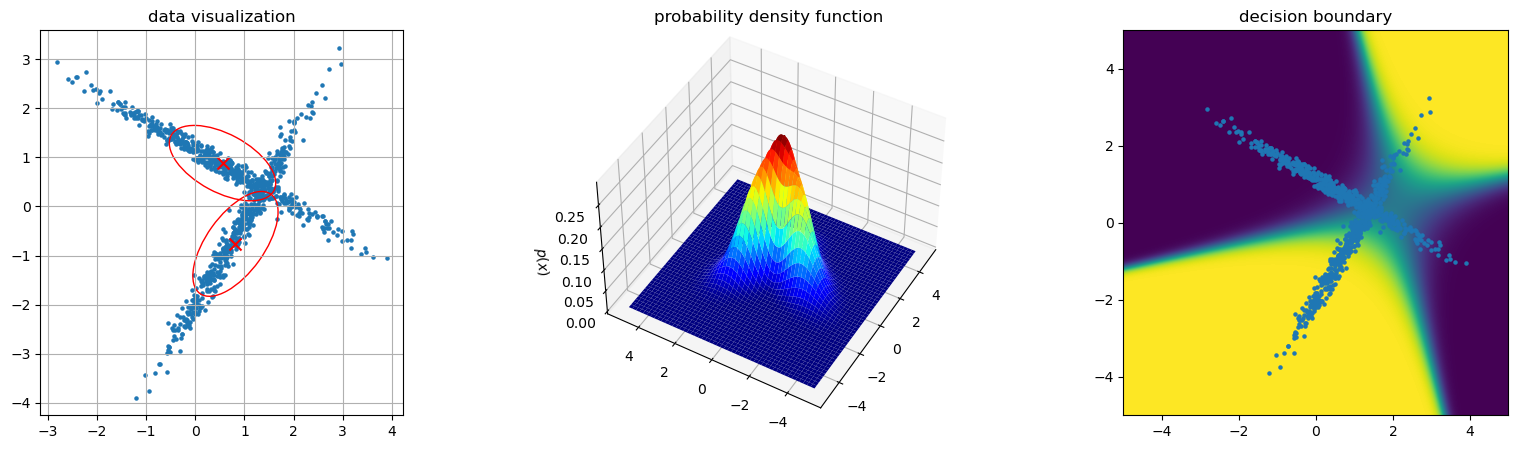

In [80]:
# maximization step
means, covs, rho = maximization_step(X, gamma)

# plot GMM
ex4_plot_GMM(X, means, covs, rho)

### End of exercise 3.3
---
---

---
---
### Exercise 3.4: Log-likelihood calculation
Create a function `J = loglikelihood(X, means, covs, rho)` that accepts the data set, means, covariance matrices and mixing coefficients with dimensions specified above. This function should calculate and return the log-likelihood of the data under the specified Gaussian mixture model. Use the definition as specified in the beginning of Part 3.

In [81]:
#// BEGIN_TODO Complete the loglikelihood(X, means, covs, rho) function
def loglikelihood(X, means, covs, rho):
    N, D = X.shape
    K = means.shape[0]
    
    # Calculate the probability density for each data point under each Gaussian component
    log_likelihood = 0
    for i in range(N):
        likelihood_i = 0
        for k in range(K):
            mvn = multivariate_normal(mean=means[k], cov=covs[k])
            likelihood_i += rho[k] * mvn.pdf(X[i])
        log_likelihood += np.log(likelihood_i)
    
    return log_likelihood
#// END_TODO 

### End of exercise 3.4
---
---

---
---
### Exercise 3.5: Gaussian mixture modeling
Now that all the subfunctions have been defined it is time to tie them together and to form a function which does the Gaussian mixture modelling. Create a function `means, covs, rho, gamma, J = GMM_modeling(X, K, nr_iterations)` that does the following:

1. Initialize the parameters of the Gaussian mixture model.
2. Performs `nr_iterations` iterations of the following:
    1. Perform the expectation step.
    2. Perform the maximization step.
    3. Calculate the log-likelihood.
3. returns the parameters and a vector of saved values of the log-likelihood.

The function should return all the parameters of the trained Gaussian mixture model, containing the final means, covariance matrices, mixing coefficients, responsibilities and a vector containing all calculated values of the log-likelihood.

In [82]:
#// BEGIN_TODO Complete the GMM_modeling(X, K, nr_iterations) function

def GMM_modeling(X, K, nr_iterations):
    # Initialize the parameters of the GMM
    means, covs, rho = initialize_GMM(X, K)
    
    # Initialize the log-likelihood list
    J = []
    
    # Perform the specified number of iterations
    for _ in range(nr_iterations):
        # Perform the expectation step
        gamma = expectation_step(X, means, covs, rho)
        
        # Perform the maximization step
        means, covs, rho = maximization_step(X, gamma)
        
        # Calculate the log-likelihood
        log_likelihood = loglikelihood(X, means, covs, rho)
        J.append(log_likelihood)
    
    return means, covs, rho, gamma, J

#// END_TODO 

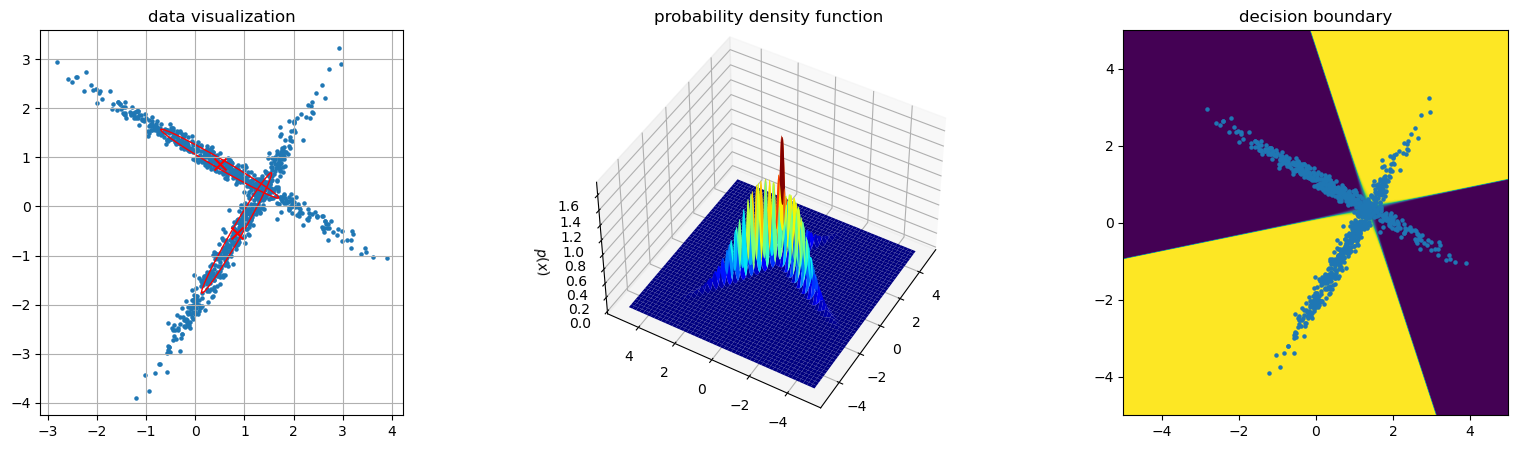

In [83]:
# train GMM
means, covs, rho, gamma, J = GMM_modeling(X, 2, 10)

# plot GMM
ex4_plot_GMM(X, means, covs, rho)

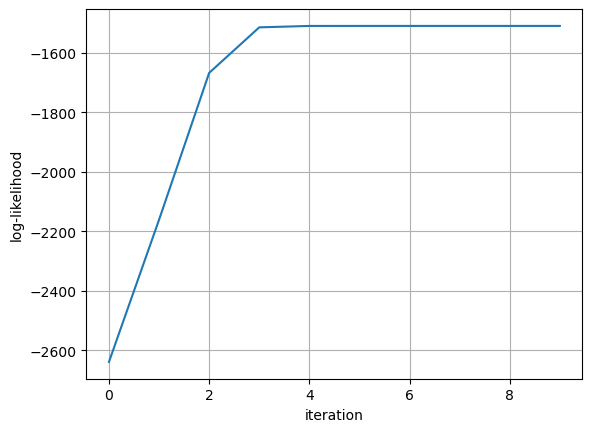

In [84]:
plt.figure()
plt.plot(J)
plt.grid(), plt.xlabel("iteration"), plt.ylabel("log-likelihood");

### End of exercise 3.5
---
---

### Exercise 3.6: Gaussian mixture modeling with biking data
Now that you have an end to end understanding of GMM pipeline, implement your hardcoded methodology on your biking data. Do not forget to perform PCA. For this exercise, use your `combined_features` matrix.

Final Means:
 [[-1.32574261  0.88213679]
 [ 1.03099826 -2.51396365]
 [ 4.00081793  2.18965824]]
Final Covariances:
 [[[ 1.30982042 -0.76369607]
  [-0.76369607  2.73078707]]

 [[ 1.65115878  0.52031491]
  [ 0.52031491  0.35827267]]

 [[21.61767553  6.56225445]
  [ 6.56225445  4.45124759]]]
Final Mixing Coefficients:
 [0.58171229 0.30382054 0.11446717]
Final Responsibilities (gamma):
 [[4.93716923e-02 9.49411560e-01 1.21674731e-03]
 [2.26806528e-02 9.75917916e-01 1.40143137e-03]
 [8.54905718e-03 9.89936714e-01 1.51422896e-03]
 ...
 [9.81543599e-01 4.81777949e-33 1.84564013e-02]
 [9.82052428e-01 3.10049488e-32 1.79475724e-02]
 [9.83735926e-01 9.53401583e-35 1.62640741e-02]]
Log-Likelihood Values:
 [-13610.025367369404, -13495.126873425685, -13411.520762022172, -13336.41327098038, -13268.059293099177, -13211.29408362557, -13172.681743997053, -13152.313869004858, -13142.988102270929, -13138.731704814252]


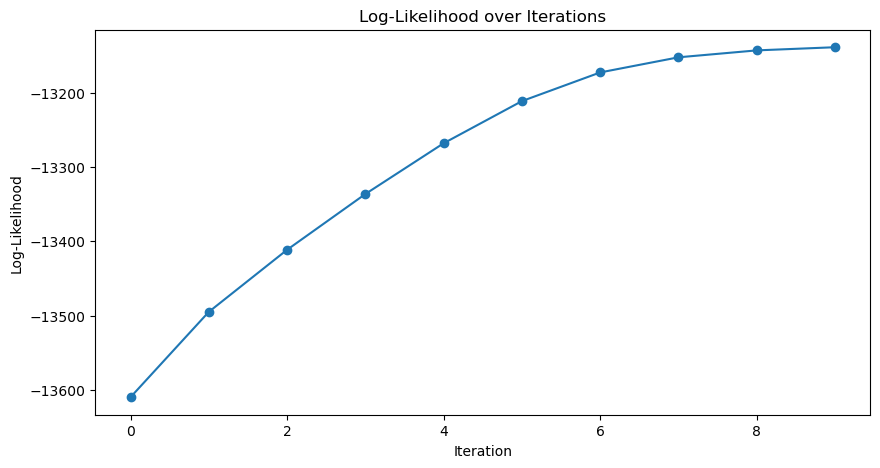

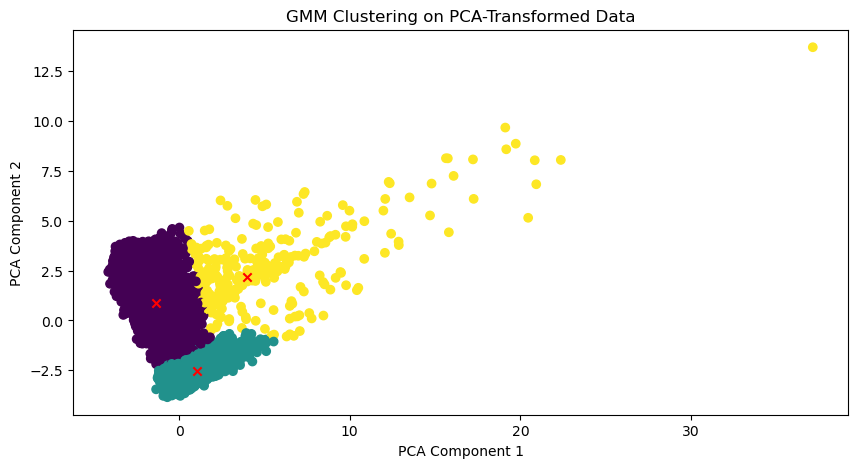

In [85]:
#// BEGIN_TODO Complete the initialize_GMM(X, K) function

# Doing it again to avoid confusion. Though it's redundant code.
# Read the CSV files
combined_features = pd.read_csv('combined_features.csv')

# Apply PCA with 2 components to both datasets
pca = PCA(n_components=2)
pca_combined = pca.fit_transform(combined_features)

K = 3  # Number of clusters, you can adjust this based on your requirement
nr_iterations = 10  # Number of iterations, you can adjust this based on your requirement

# Perform GMM modeling on the PCA-transformed data, pca_combined is already pca transformed.
means, covs, rho, gamma, J = GMM_modeling(pca_combined, K, nr_iterations)

# Print the results
print("Final Means:\n", means)
print("Final Covariances:\n", covs)
print("Final Mixing Coefficients:\n", rho)
print("Final Responsibilities (gamma):\n", gamma)
print("Log-Likelihood Values:\n", J)

# Visualize the log-likelihood over iterations
plt.figure(figsize=(10, 5))
plt.plot(range(nr_iterations), J, marker='o')
plt.title('Log-Likelihood over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.show()

# Visualize the final clustering
plt.figure(figsize=(10, 5))
plt.scatter(pca_combined[:, 0], pca_combined[:, 1], c=np.argmax(gamma, axis=1), cmap='viridis', marker='o')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x')
plt.title('GMM Clustering on PCA-Transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#// END_TODO 



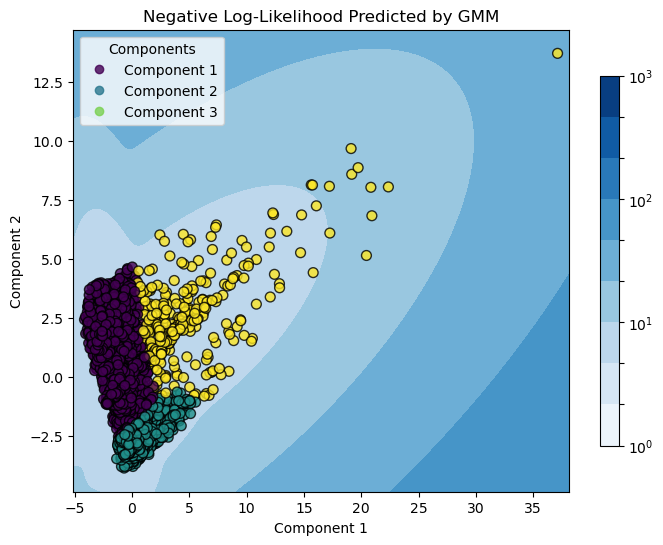

In [86]:
# testing your implementation against sklearn implementation

def plot_gmm_contours(gmm, X, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # Define the grid
    x = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300)
    y = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
    X_grid, Y_grid = np.meshgrid(x, y)
    XY = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    
    # Compute the negative log-likelihood of the GMM over the grid
    Z = -gmm.score_samples(XY)
    Z = Z.reshape(X_grid.shape)

    # Plot the contour
    CS = ax.contourf(X_grid, Y_grid, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), cmap='Blues')
    CB = plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')
    
    # Predict the component assignments for each data point
    labels = gmm.predict(X)
    
    # Plot data points with colors based on component assignment
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k', alpha=0.8)
    
    ax.set_title('Negative Log-Likelihood Predicted by GMM')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.axis('tight')

    # Add a legend to the plot
    handles, labels_legend = scatter.legend_elements(num=len(np.unique(labels)))
    ax.legend(handles, [f'Component {i+1}' for i in np.unique(labels)], title="Components")
    
    plt.show()

# Perform PCA
pca_object = PCA(n_components=2)  # Replace ICA with PCA
data_pca = pca_object.fit_transform(combined_features)  # Apply PCA to combined_features

# Fit GMM on PCA-transformed data
gmm_pca = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_pca.fit(data_pca)

# Plot GMM contours for PCA data
plot_gmm_contours(gmm_pca, data_pca)


### End of exercise 3.6
---
---


### Exercise 3.7: Number of GMM components
Proceeding with the sklearn implementation, employ different elbow based quantitative techniques to decide optimum number of components. Employ your `combined_features` matrix and sklearn implementation.

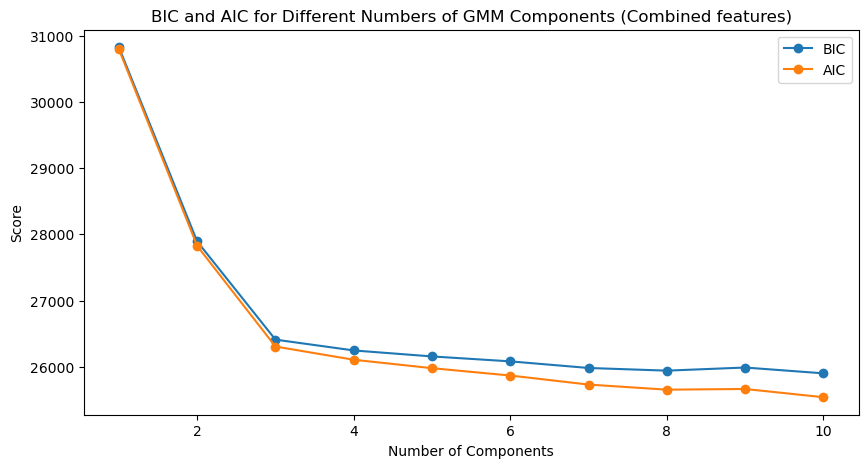

In [87]:
#// BEGIN_TODO determine number of GMM components

# Define a function to compute BIC and AIC for different numbers of components
def compute_bic_aic(X, max_components, dataset_name):
    bics = []
    aics = []
    components_range = range(1, max_components + 1)
    
    for n_components in components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
        gmm.fit(X)
        bics.append(gmm.bic(X))
        aics.append(gmm.aic(X))
        
    # Plot BIC and AIC to find the optimal number of components
    plt.figure(figsize=(10, 5))
    plt.plot(components_range, bics, label='BIC', marker='o')
    plt.plot(components_range, aics, label='AIC', marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Score')
    plt.title('BIC and AIC for Different Numbers of GMM Components (' + dataset_name + ')')
    plt.legend()
    plt.show()
    return components_range, bics, aics



# Compute BIC and AIC for different numbers of components
max_components = 10  # You can adjust this based on your requirement
components_range, bics, aics = compute_bic_aic(pca_combined, max_components,'Combined features')

#// END_TODO 


`#// BEGIN_TODO determine number of GMM components`

From the BIC and AIC plot, it's clear that 3 GMM components is a reasonable choice and adding beyond that doesn't improve the model fit any further significantly. 3 components mean 3 gaussian distributions will be used to fit the data.

`#// END_TODO `


### End of exercise 3.7
---
---

### Exercise 3.8: Building the bumpy lane detector
You made it this far. We are almost there. Now, train two gaussian mixture models, one using your smooth data `smooth_features` and one using your `bumpy_features`. For this assignment you are provided with a testing data taken from biking in Tilburg for 17 minutes on biking lane with diverse features. You are requested to employ your models to determine which segments of the road are bumpy and which segments are smooth. You must employ your preprocessing skills and provide your judgement on road segments for each 30 second segment. 
for example : bumpy, smooth, smooth, bumpy, smooth, etc... until end of the road!
Good luck

In [88]:
#// BEGIN_TODO train two GMM models

# Doing it again to avoid confusion. Though it's redundant code.
# Read the CSV files
smooth_features = pd.read_csv('smooth_features.csv')
bumpy_features = pd.read_csv('bumpy_features.csv')

# Apply PCA with 2 components to both datasets
pca = PCA(n_components=2)
pca_smooth = pca.fit_transform(smooth_features)
pca_bumpy = pca.fit_transform(bumpy_features)

# Train GMM on smooth features
gmm_smooth = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_smooth.fit(pca_smooth)
print(gmm_smooth)

# Train GMM on bumpy features
gmm_bumpy = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_bumpy.fit(pca_bumpy)

#// END_TODO 


GaussianMixture(n_components=3, random_state=42)


GaussianMixture(n_components=3, random_state=42)

In [89]:
#// BEGIN_TODO Preproces Tilburg data

# Load the recordings from different sensors
sensor1 = pd.read_csv('/Users/shalin.james/Documents/Masters/TUe/Data Acquisition/1b_Assig/Tilburg/Accelerometer.csv') #sensor1=accelerometer
sensor2 = pd.read_csv('/Users/shalin.james/Documents/Masters/TUe/Data Acquisition/1b_Assig/Tilburg/Gravity.csv')       #sensor2=gravity
sensor3 = pd.read_csv('/Users/shalin.james/Documents/Masters/TUe/Data Acquisition/1b_Assig/Tilburg/Gyroscope.csv')     #sensor3=gyroscope

#Set the time as index
sensor1 = sensor1.set_index('seconds_elapsed')
sensor2 = sensor2.set_index('seconds_elapsed')
sensor3 = sensor3.set_index('seconds_elapsed')

#Drop the timestamp column
sensor1 = sensor1.drop(columns=['time'])
sensor2 = sensor2.drop(columns=['time'])
sensor3 = sensor3.drop(columns=['time'])

# Merging the recordings 
data = pd.merge_asof(sensor1, sensor2, on='seconds_elapsed')
data = pd.merge_asof(data, sensor3, on='seconds_elapsed')

#Rename the columns
data = data.rename(columns={'z_x': 'z_Accelerometer', 'y_x': 'y_Accelerometer', 'x_x': 'x_Accelerometer', 'z_y': 'z_Gravity', 'y_y': 'y_Gravity', 'x_y': 'x_Gravity', 'z': 'z_Gyro', 'y': 'y_Gyro', 'x': 'x_Gyro'})

#set the time as index
data = data.set_index('seconds_elapsed')

############################################################################################################

# Trim the data by removing the first and last 5 seconds
delta_t = data.index.to_series().diff().mean()  # Calculate the average time difference between two consecutive samples (index is seconds_elapsed for df data)
rows_to_trim = int(5 / delta_t)  # Calculate the number of rows to trim for 5 seconds

data_trimmed = data.iloc[rows_to_trim:-rows_to_trim]
data = data_trimmed

# Normalize the data
data_norm = data.copy()
data_norm = (data_norm - data_norm.mean(axis=0)) / data_norm.std()

data_tilburg = data_norm #Tilburg data is now cleaned and normalized

############################################################################################################

# Preprocess the data using 'process_segment' function from Assignment 1a. It's imported earlier.

# First, we need to convert the dataframe to a numpy array
mat_merged = data_tilburg.to_numpy()

# Process the segment (We wanted to import this function instead of writing it again, but wrote it again to avoid confusion)
def process_segment(mat, fun, L, K):
    # Find the number of segments
    num_segments = (mat.shape[0] - K) // (L - K)
    
    # Initialize a list to store the results
    results = []
    
    # Loop through the matrix to create overlapping segments
    for i in range(num_segments):
        start = i * (L - K)
        end = start + L
        segment = mat[start:end, :] #slicing basically
        
        if fun == "mean":
            result = np.mean(segment, axis=0)
        elif fun == "std":
            result = np.std(segment, axis=0)
        elif fun == "minimum":
            result = np.min(segment, axis=0)
        elif fun == "maximum":
            result = np.max(segment, axis=0)
        else:
            raise ValueError("Invalid function specified")
        
        results.append(result) #Keep appending the results
    
    # Convert the list of results to a Numpy array
    Y = np.array(results)
    
    return Y

#We had chosen this value in the previous assignment, so we are using the same value here.
L=30 
K=1

Y_mean_1 = process_segment(mat_merged, "mean", L, K)
Y_std_1 = process_segment(mat_merged, "std", L, K)
Y_minimum_1 = process_segment(mat_merged, "minimum", L, K)
Y_maximum_1 = process_segment(mat_merged, "maximum", L, K)

combined_tilburg = np.concatenate((Y_mean_1, Y_std_1, Y_minimum_1, Y_maximum_1), axis=1)

############################################################################################################

# Initialize PCA with 2 components
n_components=2
pca = PCA(n_components=2)

# Fit and transform the combined fatures
pca_tilburg = pca.fit_transform(combined_tilburg) #It is now PCA transformed, ready.

#// END_TODO 


In [90]:
#// BEGIN_TODO Classify Tilburg biking lane
sampling_rate = 100  # samples per second
window_duration = 30  # seconds
samples_per_window = window_duration * sampling_rate  # total samples per 30 seconds

segment_length = 30  # number of samples per segment (L)
overlap = 1  # overlap of samples between segments (K)

# Initialize variables
accumulated_samples = []
predictions = []

# Loop through each segment in pca_Tilburg
for segment in pca_tilburg:
    # Append the segment to the accumulated_samples list
    accumulated_samples.append(segment)
    
    # Check if the accumulated samples cover 30 seconds
    if len(accumulated_samples) * (segment_length - overlap) >= samples_per_window:
        # Combine accumulated segments into one 30-second block
        combined_segment = np.vstack(accumulated_samples)  # Adjust if needed
        
        # Classify the 30-second block
        log_likelihood_smooth = gmm_smooth.score(combined_segment)
        log_likelihood_bumpy = gmm_bumpy.score(combined_segment)
        
        # Assign the higher likelihood class
        if log_likelihood_smooth > log_likelihood_bumpy:
            predictions.append('smooth')
        else:
            predictions.append('bumpy')
        
        # Reset accumulated samples for the next 30-second window
        accumulated_samples = []

# Print or save the predictions
print(predictions)



#// END_TODO 


['bumpy', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'bumpy', 'smooth', 'bumpy', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'bumpy', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'smooth', 'bumpy', 'bumpy', 'smooth', 'smooth', 'smooth', 'bumpy', 'smooth', 'bumpy', 'smooth']


Based on the data you’ve collected and the predictions you've made, summarize your opinion on the overall quality of Tilburg’s biking lanes. In no more than 100 words, provide your general impression of the road conditions, highlighting whether the lanes are predominantly smooth or bumpy. Additionally, offer any recommendations for potential improvements based on the results of your analysis.

Answer:

We feel that Tilburg’s biking lanes appear predominantly smooth, as shown by the overwhelming green segments representing smooth conditions. However, there are occasional bumpy sections, indicated by the red bars, which might disrupt the overall riding experience. To improve the quality of the biking lanes, Tilburg could focus on resurfacing these specific bumpy areas to ensure a consistently smooth ride, enhancing safety and comfort for cyclists. Regular maintenance checks can also help identify new problem areas and address them promptly. Maybe our chart can help to easily identify where the  bumpy parts are as each segment is a 30s segment from where we started recording the data, +/- 5s. 

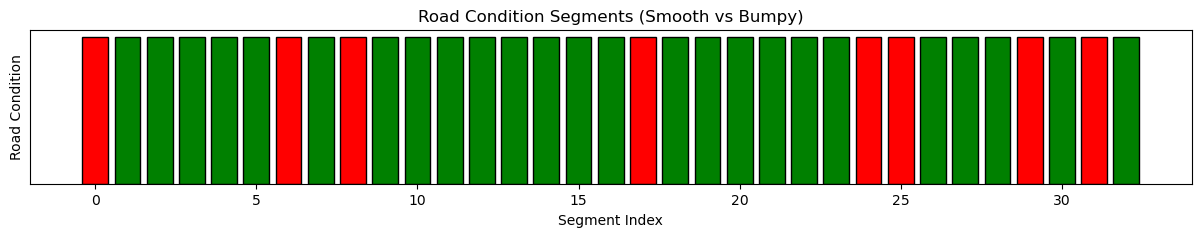

In [91]:
#// Tilburg lane quality

# Let's define the colors for smooth and bumpy segments
colors = {'smooth': 'green', 'bumpy': 'red'}

# Create a list of colors based on the predictions
segment_colors = [colors[prediction] for prediction in predictions]

# Create the bar chart
plt.figure(figsize=(15, 2))
plt.bar(range(len(predictions)), [1] * len(predictions), color=segment_colors, edgecolor='black')
plt.xlabel('Segment Index')
plt.ylabel('Road Condition')
plt.title('Road Condition Segments (Smooth vs Bumpy)')
plt.yticks([])
plt.show()

#// END_TODO 

### End of exercise 3.8
---
---

> Make sure to restart this notebook and to rerun all cells before submission to check whether all code runs properly.

# End of Assignment 1b